# IERG 5350 Assignment 4: Reinforcement Learning Pipeline in Practice


**You are not required to have to write anything in this notebook**. But you can always play with this notebook if you find the code here useful to prepare your submission. We only grade your assignment based on the PDF file and those TODOs in code.


# Section 1: Get familiar with the environment

We prepared a set of pre-defined MetaDrive environments to train your agents. 

The first is `MetaDrive-Tut-Easy-v0`, which only has one map with only a straight road.

The second is `MetaDrive-Tut-Hard-v0`, which contains 10 maps, each map has three blocks with complex road network.

We also prepare a set of 

In this section, we first take a glance at these environments.

### **Please note that each MetaDrive can only run in single process. If you encounter any environmental error, please firstly try to restart the notebook and rerun the cell.**


In [ ]:
import gym
from core.utils import register_metadrive

register_metadrive()
env = gym.make("MetaDrive-Tut-Easy-v0", config={"use_render": True})
try:
    obs = env.reset()
    for i in range(200):
        obs, rew, term, _ = env.step(env.action_space.sample())
        if term:
            break
finally:
    env.close()

print("Demonstration finished!")

In [ ]:
import gym
from core.utils import register_metadrive

register_metadrive()
env = gym.make("MetaDrive-Tut-Hard-v0", config={"use_render": True})
try:
    for _ in range(10):
        obs = env.reset()
        for i in range(15):
            obs, rew, term, _ = env.step(env.action_space.sample())
        env.switch_to_top_down_view()  # Change to top-down view
        for i in range(15):
            obs, rew, term, _ = env.step(env.action_space.sample())
finally:
    env.close()

print("Demonstration finished!")

# Section 2: Implement base trainer

You should finish `compute_action` in `core/base_trainer.py`. Run the next cell to make sure the code is working.

In [ ]:
%run core/base_trainer.py

# Section 3: Finish A2C trainer and training script

You need to implement `update` and `compute_loss` function in `core/a2c_trainer.py`.
You also need to implement the TODOs in `train.py`.

To compute the expected return which is then used to calculate the advantages, `A2CRolloutStorage` in `core/buffer.py` is also necessary.

Run the next cell to verify your code is working.

In [ ]:
%run train.py --env-id CartPole-v0 --algo A2C --log-dir CartPole --num-envs 10 --max-steps 500000

Text(0.5, 0, 'Sampled Steps')

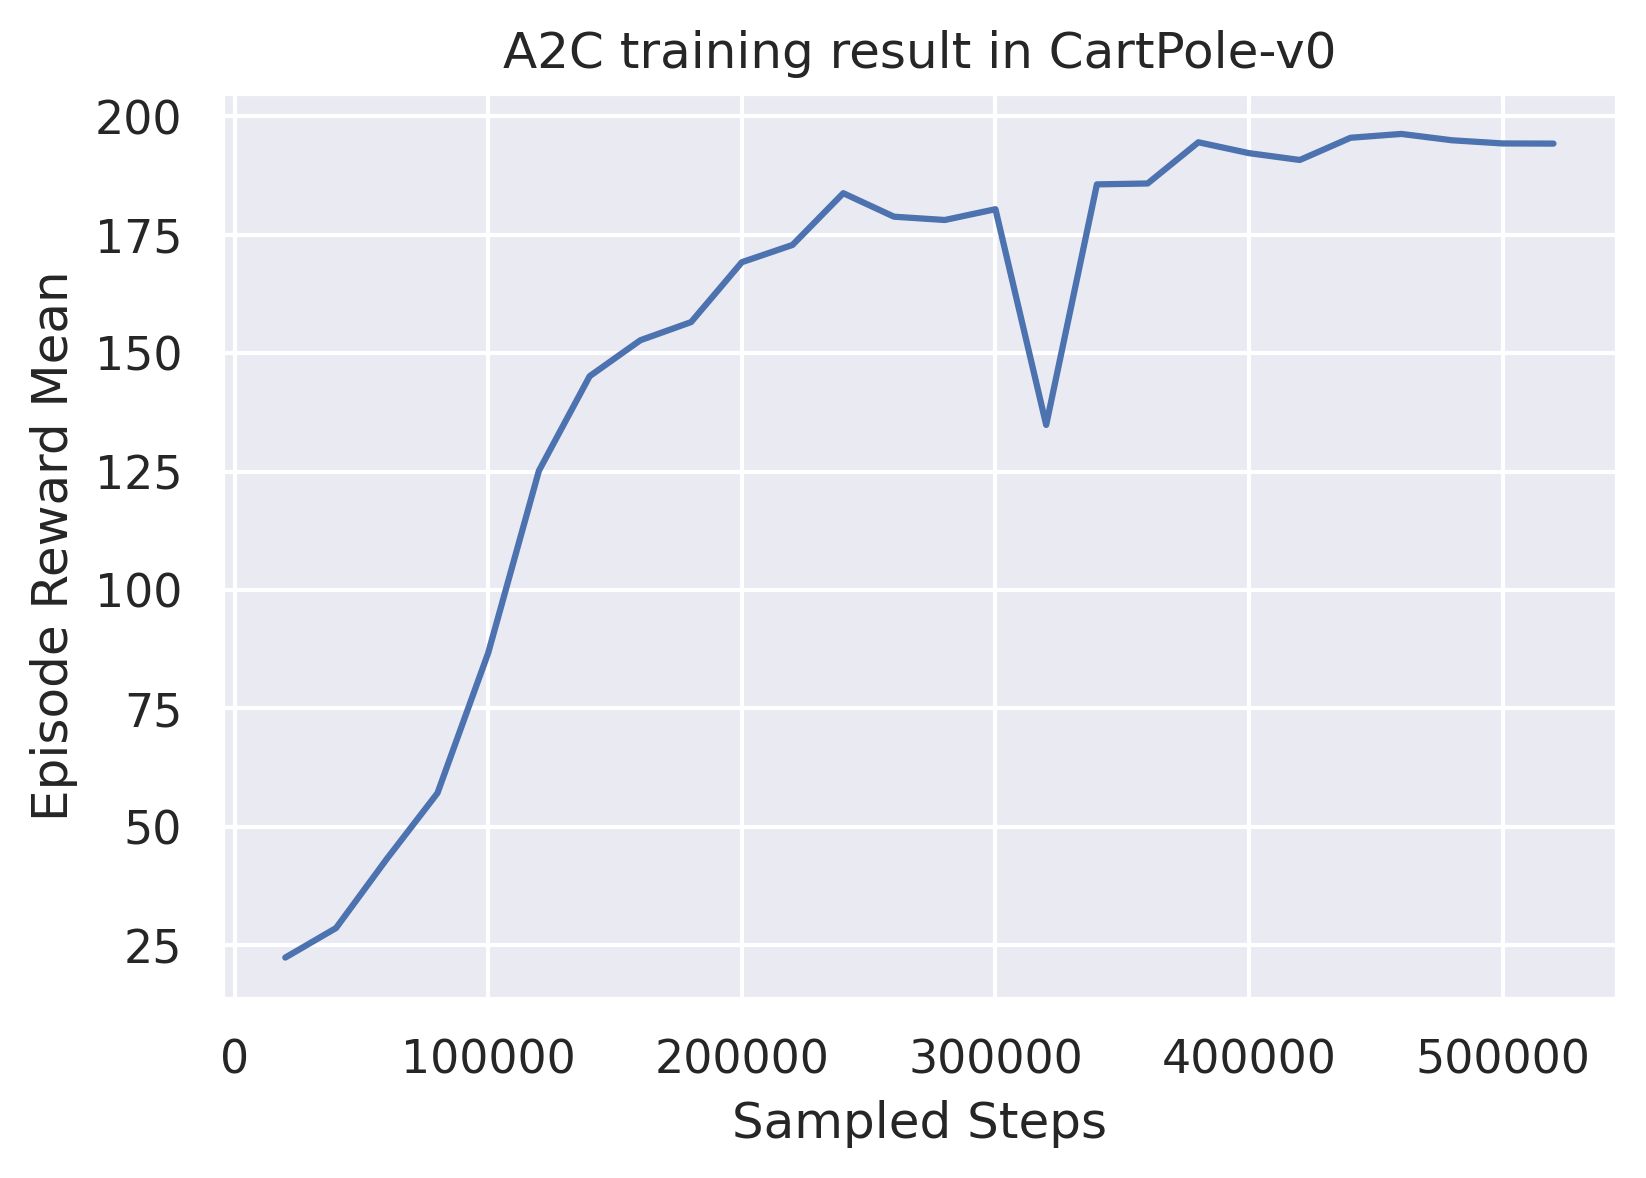

In [1]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("CartPole/A2C")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("A2C training result in CartPole-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.

### Also train A2C in MetaDrive easy environment.

As you can see in the demonstrative figure below, A2C performs badly. This is expected, so don't worry!

In [ ]:
%run train.py --env-id MetaDrive-Tut-Easy-v0 --algo A2C --log-dir MetaDriveEasy \
  --num-envs 10 --max-steps 500000

Text(76666.66666666667, 1.8684358477592469, 'REF')

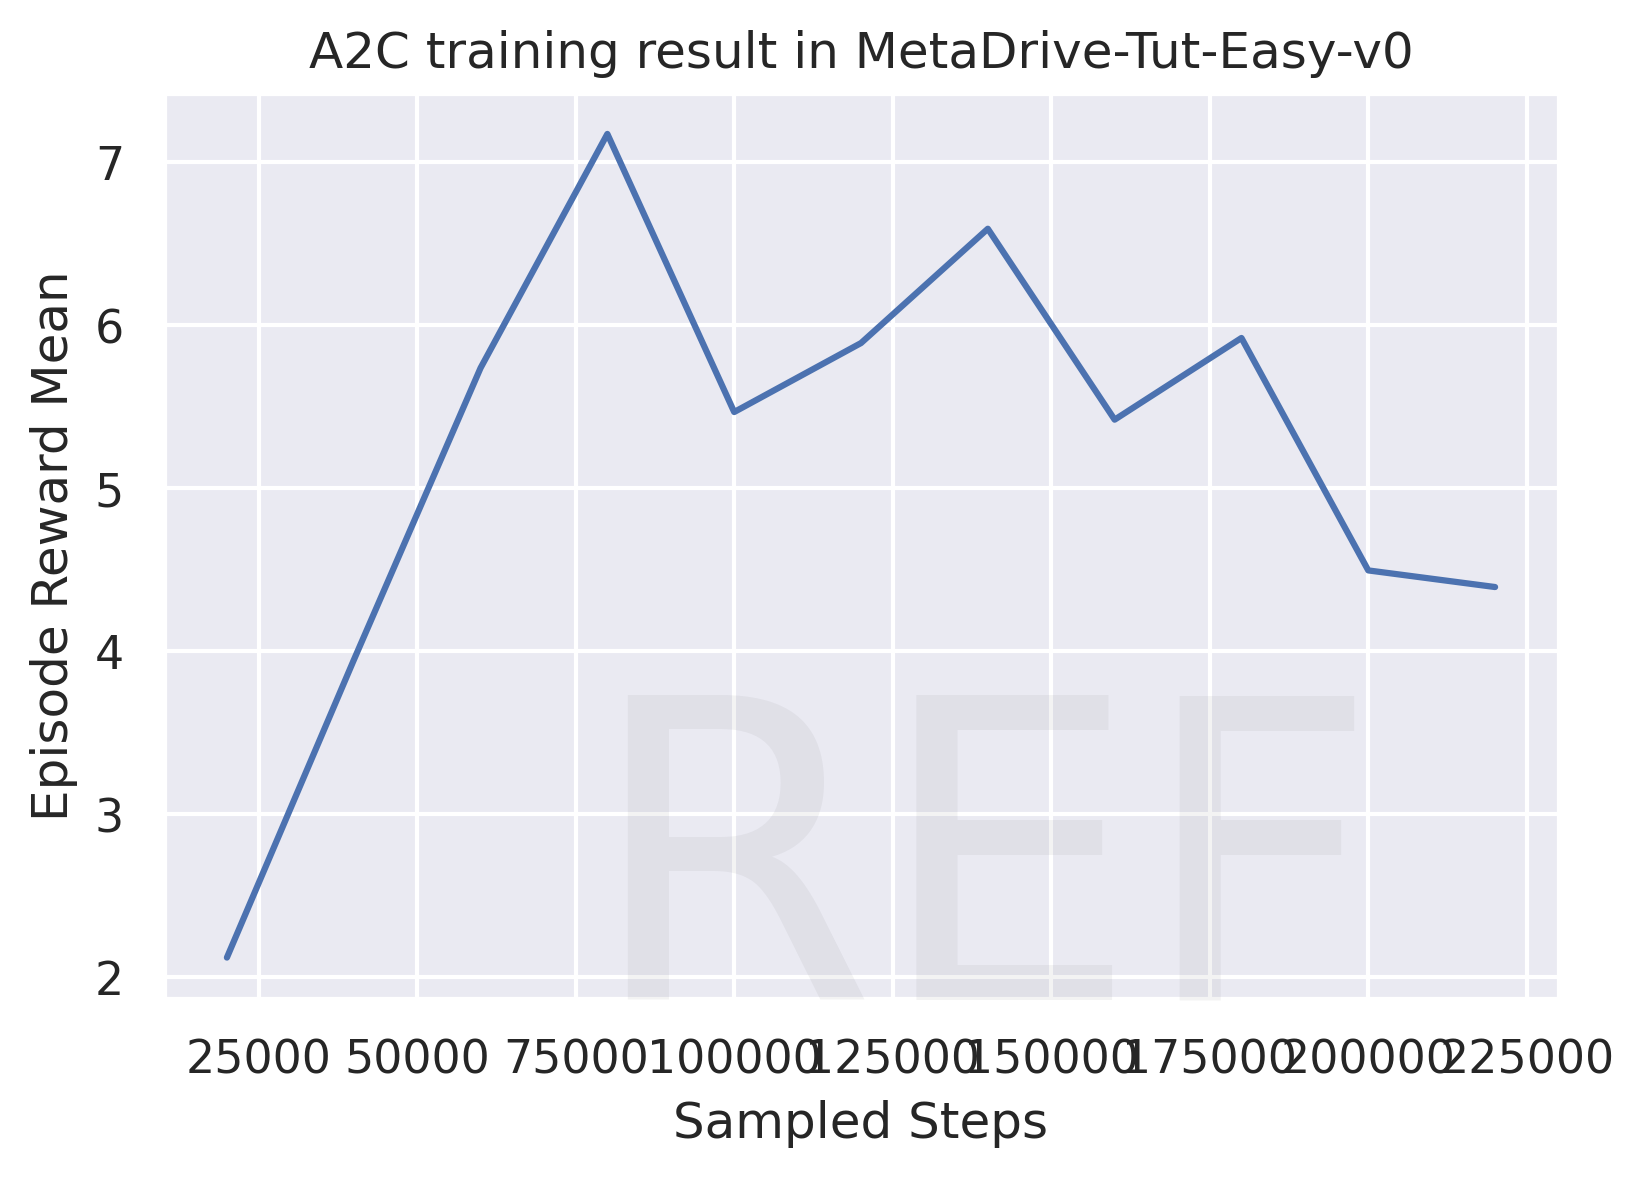

In [2]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("MetaDriveEasy/A2C")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("A2C training result in MetaDrive-Tut-Easy-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.


## Section 4: Finish PPO trainer and train a driving agent

You need to finish `core/ppo_trainer.py` and `core/buffer.py`.

Here we use GAE [1] (Generalized Advantage Estimation) to estimate the advantage. This technique is implemented in `PPORolloutStorage.compute_returns` in `core/buffer.py`. Concretely, we estimate the advantage of current state $t$ via:

$$\delta_t = r_t + \gamma V(s_t+1) - V(s_t)$$

$$A^{GAE}_t = \sum_{l=0}^{\infty} (\gamma \lambda) ^ l \delta_{t+l}$$

wherein $V$ is the state value function, $\lambda$ is a hyper-parameter defined in `core.ppo_trainer.ppo_config["gae_lambda"]`.

You can find that when $\lambda = 0$, the GAE estimates advantage in a one-step TD manner. When $\lambda = 1$, the GAE reduces to Monte Carlo Estimation of the state value. Therefore by varying the $\lambda$, we can make the trade-off between the accuracy of the estimation (bias) and the variance of advantage.

[1]: Schulman, John , et al. "High-Dimensional Continuous Control Using Generalized Advantage Estimation." (2015).

### Train and observe the learning curve of PPO in CartPole

In [ ]:
%run train.py --env-id CartPole-v0 --algo PPO --log-dir CartPole --num-envs 10 --max-steps 300000

Text(111666.66666666667, 13.467500400543212, 'REF')

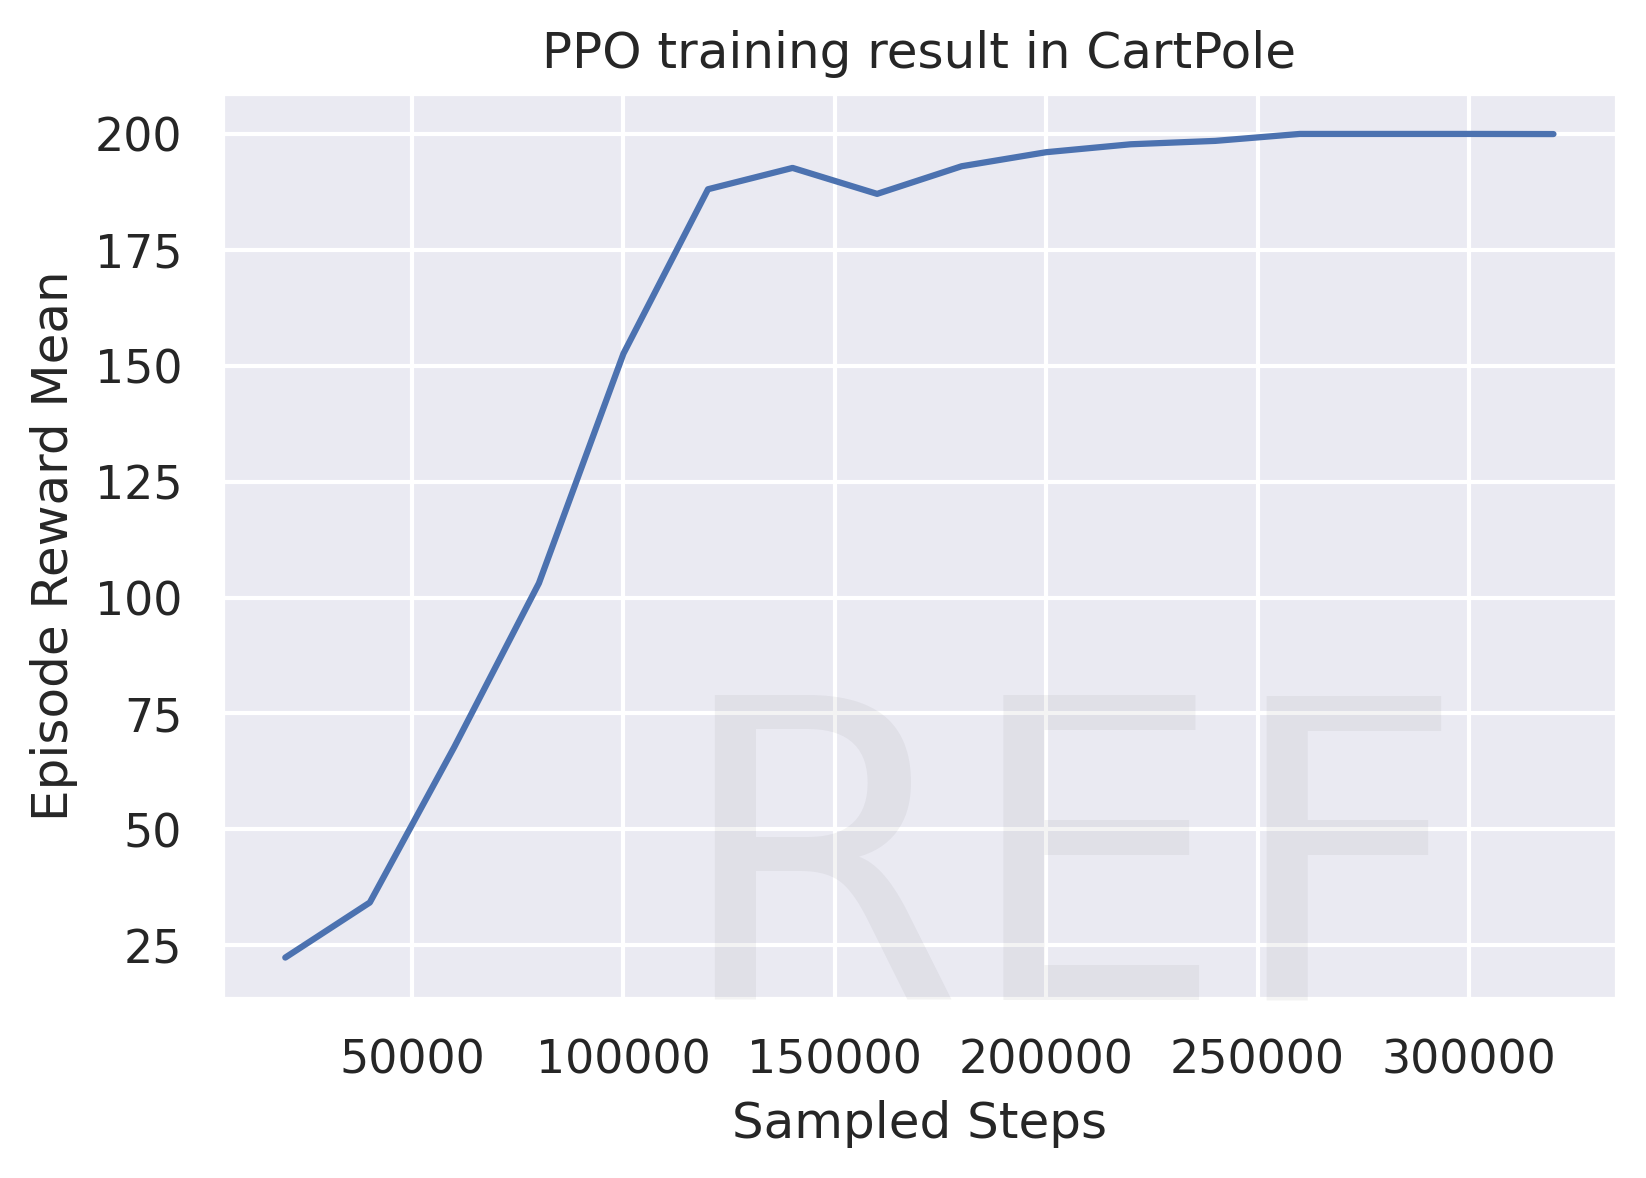

In [3]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("CartPole/PPO")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("PPO training result in CartPole")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.

### Train and observe the learning curve of PPO in MetaDrive Easy Env.

In [1]:
%run train.py \
  --env-id MetaDrive-Tut-Easy-v0 \
  --algo PPO \
  --log-dir MetaDriveEasy \
  --num-envs 10 \
  --max-steps 1000000

Start training!
Steps: 0， Episode_reward_mean: 2.1210644245147705， Success Rate: 0.0
Steps: 1， Episode_reward_mean: 3.2295660972595215， Success Rate: 0.0
Steps: 2， Episode_reward_mean: 3.9603500366210938， Success Rate: 0.0
Steps: 3， Episode_reward_mean: 5.756279945373535， Success Rate: 0.0
Steps: 4， Episode_reward_mean: 9.246966361999512， Success Rate: 0.0
Steps: 5， Episode_reward_mean: 11.532217025756836， Success Rate: 0.0
Steps: 6， Episode_reward_mean: 13.166543006896973， Success Rate: 0.0
Steps: 7， Episode_reward_mean: 14.894430160522461， Success Rate: 0.0
Steps: 8， Episode_reward_mean: 12.227448463439941， Success Rate: 0.0
Steps: 9， Episode_reward_mean: 15.288592338562012， Success Rate: 0.0
Steps: 10， Episode_reward_mean: 16.53931427001953， Success Rate: 0.0
Steps: 11， Episode_reward_mean: 21.855796813964844， Success Rate: 0.0
Steps: 12， Episode_reward_mean: 24.33413314819336， Success Rate: 0.0
Steps: 13， Episode_reward_mean: 32.094974517822266， Success Rate: 0.0
Steps: 14， Episode

Text(0.5, 0, 'Sampled Steps')

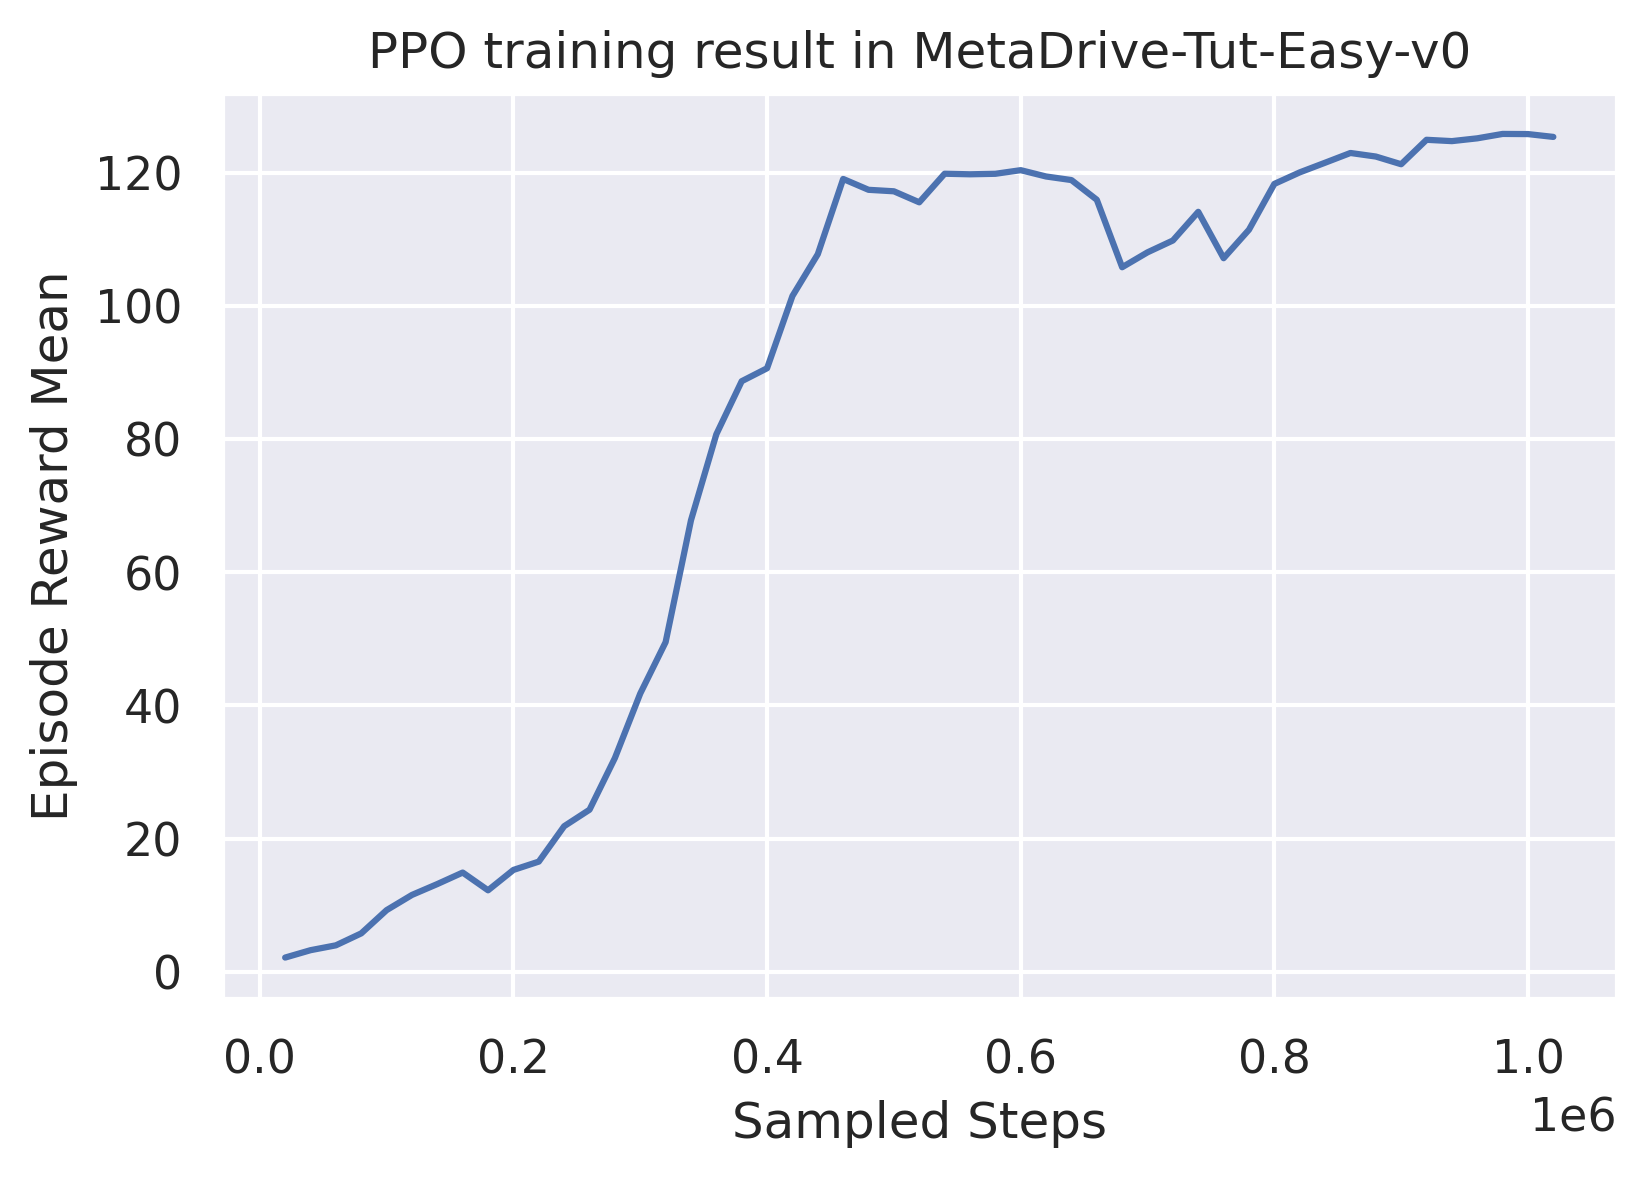

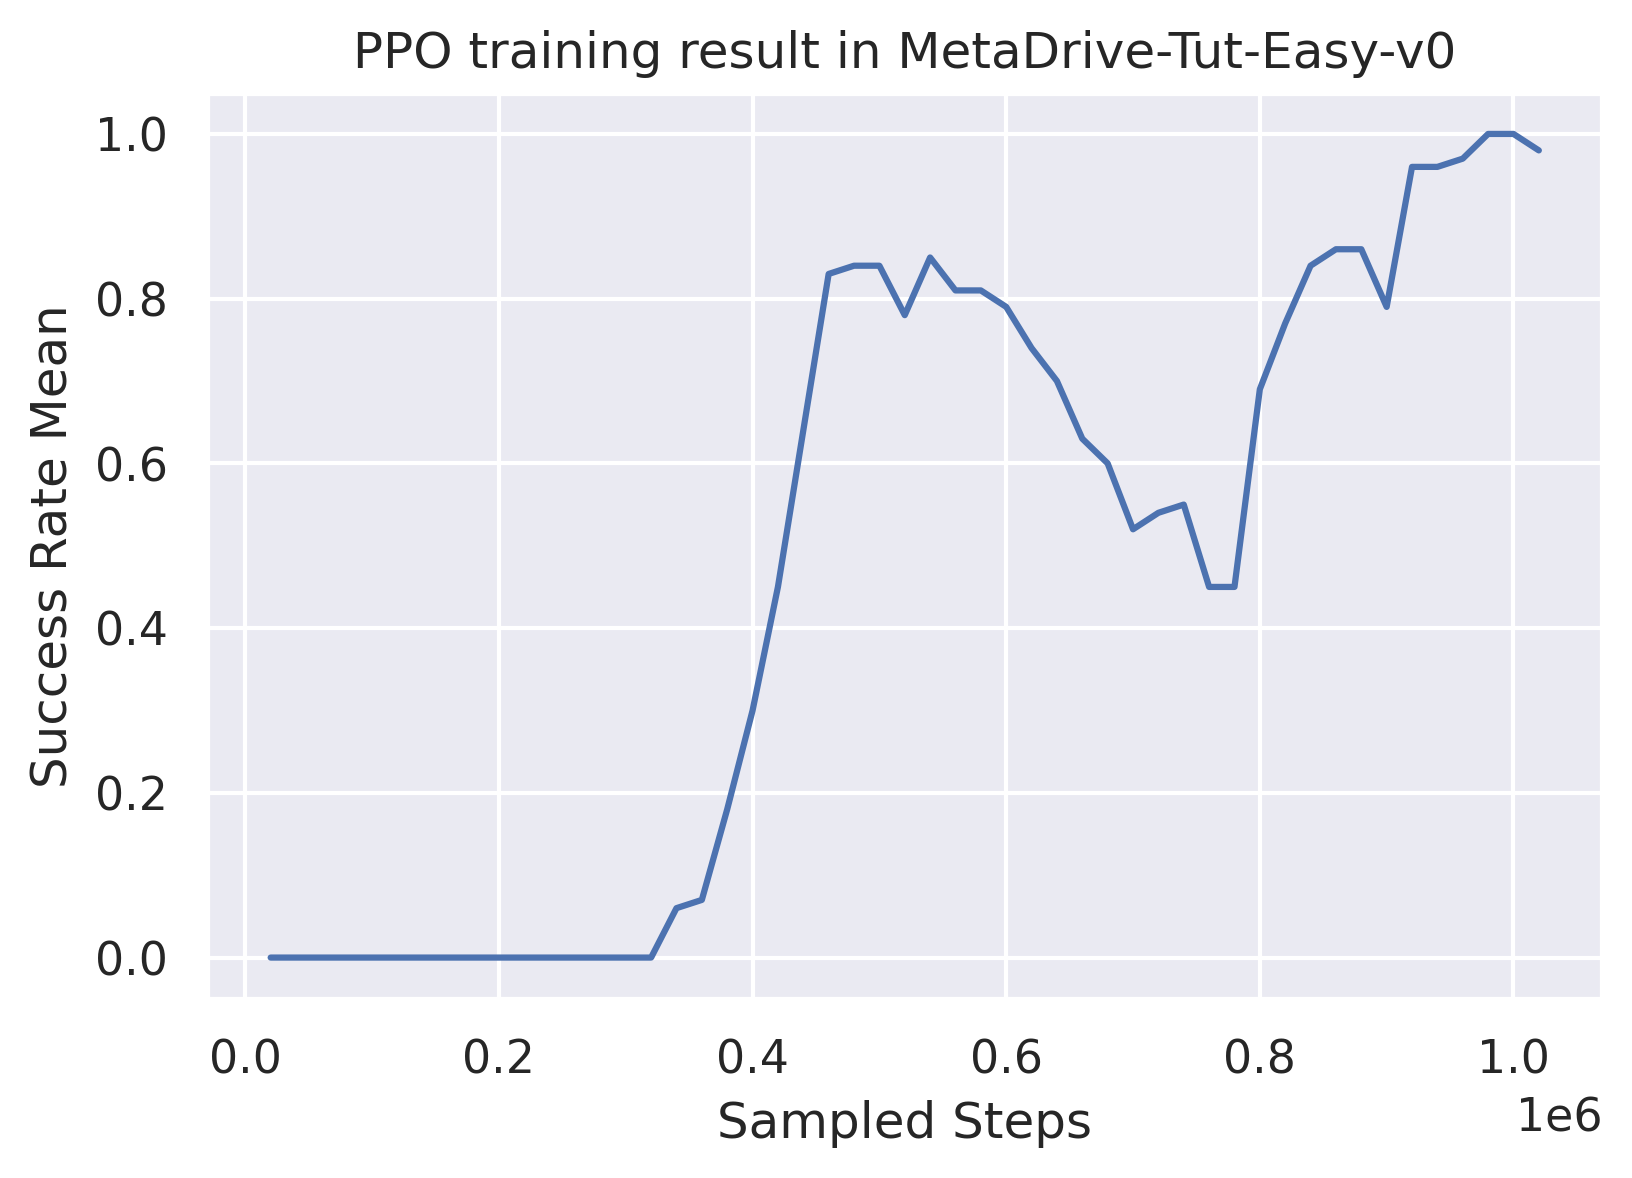

In [2]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("MetaDriveEasy/PPO")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("PPO training result in MetaDrive-Tut-Easy-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("PPO training result in MetaDrive-Tut-Easy-v0")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.

In [1]:
%run train.py --env-id MetaDrive-Tut-Hard-v0 --algo PPO --log-dir MetaDriveHard --num-envs 10 --max-steps 10000000

Start training!
Steps: 0， Episode_reward_mean: 7.307821273803711， Success Rate: 0.0
Steps: 1， Episode_reward_mean: 9.190213203430176， Success Rate: 0.0
Steps: 2， Episode_reward_mean: 11.191619873046875， Success Rate: 0.0
Steps: 3， Episode_reward_mean: 13.052534103393555， Success Rate: 0.0
Steps: 4， Episode_reward_mean: 16.420984268188477， Success Rate: 0.0
Steps: 5， Episode_reward_mean: 17.554597854614258， Success Rate: 0.0
Steps: 6， Episode_reward_mean: 19.285316467285156， Success Rate: 0.0
Steps: 7， Episode_reward_mean: 20.430160522460938， Success Rate: 0.0
Steps: 8， Episode_reward_mean: 25.284536361694336， Success Rate: 0.0
Steps: 9， Episode_reward_mean: 34.10203552246094， Success Rate: 0.0
Steps: 10， Episode_reward_mean: 48.52748489379883， Success Rate: 0.0
Steps: 11， Episode_reward_mean: 63.35698318481445， Success Rate: 0.0
Steps: 12， Episode_reward_mean: 68.12614440917969， Success Rate: 0.0
Steps: 13， Episode_reward_mean: 77.1839828491211， Success Rate: 0.029999999329447746
Steps

Steps: 115， Episode_reward_mean: 126.27867126464844， Success Rate: 0.0
Steps: 116， Episode_reward_mean: 134.67112731933594， Success Rate: 0.0
Steps: 117， Episode_reward_mean: 132.57574462890625， Success Rate: 0.0
Steps: 118， Episode_reward_mean: 127.47813415527344， Success Rate: 0.0
Steps: 119， Episode_reward_mean: 134.1846466064453， Success Rate: 0.0
Steps: 120， Episode_reward_mean: 134.02371215820312， Success Rate: 0.0
Steps: 121， Episode_reward_mean: 126.46678924560547， Success Rate: 0.0
Steps: 122， Episode_reward_mean: 134.1291961669922， Success Rate: 0.0
Steps: 123， Episode_reward_mean: 147.58595275878906， Success Rate: 0.0
Steps: 124， Episode_reward_mean: 128.2558135986328， Success Rate: 0.0
Steps: 125， Episode_reward_mean: 130.03004455566406， Success Rate: 0.0
Steps: 126， Episode_reward_mean: 138.66973876953125， Success Rate: 0.0
Steps: 127， Episode_reward_mean: 136.26568603515625， Success Rate: 0.0
Steps: 128， Episode_reward_mean: 145.11834716796875， Success Rate: 0.0
Steps: 12

Steps: 218， Episode_reward_mean: 171.3386688232422， Success Rate: 0.11999999731779099
Steps: 219， Episode_reward_mean: 149.47006225585938， Success Rate: 0.05999999865889549
Steps: 220， Episode_reward_mean: 182.2967987060547， Success Rate: 0.07999999821186066
Steps: 221， Episode_reward_mean: 156.9810791015625， Success Rate: 0.03999999910593033
Steps: 222， Episode_reward_mean: 185.48951721191406， Success Rate: 0.14000000059604645
Steps: 223， Episode_reward_mean: 167.75892639160156， Success Rate: 0.09000000357627869
Steps: 224， Episode_reward_mean: 158.6058807373047， Success Rate: 0.09000000357627869
Steps: 225， Episode_reward_mean: 182.2624969482422， Success Rate: 0.07000000029802322
Steps: 226， Episode_reward_mean: 172.46249389648438， Success Rate: 0.09000000357627869
Steps: 227， Episode_reward_mean: 164.9569549560547， Success Rate: 0.10999999940395355
Steps: 228， Episode_reward_mean: 165.04078674316406， Success Rate: 0.07000000029802322
Steps: 229， Episode_reward_mean: 179.358947753906

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [1]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("MetaDriveHard/PPO")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(2
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("PPO training result in MetaDrive-Tut-Hard-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("PPO training result in MetaDrive-Tut-Hard-v0")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.


SyntaxError: invalid syntax (3312232498.py, line 9)

### Visualize the performance of PPO in MetaDrive Easy Env.

In [2]:
# Load the agent using PolicyAPI (easy to use interface to get policy)

from core.envs import make_envs
import gym
from load_agents import PolicyAPI

env_name = "MetaDrive-Tut-Easy-v0"
policy = PolicyAPI(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDriveEasy/PPO/",
    suffix="final"
)

comp_env = gym.make(env_name, config={'use_render': True})
obs = comp_env.reset()
ep_rew = 0.0
for i in range(1000):
    frame = comp_env.render()
    obs, rew, term, _ = comp_env.step(policy(obs))
    ep_rew += rew
    if term:
        print("Episode reward: ", ep_rew)
        break
comp_env.close()
del comp_env
del policy

Successfully registered the following environments: ['MetaDrive-test-v0', 'MetaDrive-validation-v0', 'MetaDrive-v0', 'MetaDrive-10envs-v0', 'MetaDrive-1000envs-v0', 'MetaDrive-training0-v0', 'MetaDrive-training1-v0', 'MetaDrive-training2-v0'].
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully load weights from /home/jd/projects/IERG5350-Assignment/assignment4/MetaDriveEasy/PPO/checkpoint-final.pkl!


Known pipe types:
  glxGraphicsPipe
(1 aux display modules not yet loaded.)


Episode reward:  62.10087485660755


### Little example to use seaborn, pandas showing the hyper-parameter tuning results.

In [2]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"

dfs = []
    
df = load_progress("1105_w_grad_clip/PPO")
df["label"] = "10 Epoch, 1e-5 Lr, 0.3 clip param"
dfs.append(df)

df = load_progress("1105_small_clip_param/PPO")
df["label"] = "10 Epoch, 1e-5 Lr, 0.2 clip param"
dfs.append(df)

df = load_progress("1105_small_clip_param_large_mini_bs/PPO")
df["label"] = "10 Epoch, 1e-5 Lr, 0.2 clip param, 1024 mini bs"
dfs.append(df)

df = load_progress("1105_last_attempt/PPO")
df["label"] = "10 Epoch, 1e-5 Lr, 0.2 clip param, 256 mini bs"
dfs.append(df)

df = load_progress("1105_last_attempt_middle_lr/PPO")
df["label"] = "10 Epoch, 5e-5 Lr, 0.2 clip param, 256 mini bs"
dfs.append(df)

df = pd.concat(dfs)
df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=df,
    hue='label',
    x="total_steps",
    y=y
)
ax.set_title("PPO hyper-parameter searching in MetaDrive-Tut-10Env-v0")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
# ax.set_xlim(0, 1.1e6)
# ax.set_ylim(0, 8)
ax.legend(fontsize=8, loc="center right")
ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)



# Note: The following figure is for reference used only, you don't have to repreduce it.

FileNotFoundError: [Errno 2] No such file or directory: '1105_w_grad_clip/PPO/progress.pkl'

## Section 5: You should also conduct the generalization experiments and draw relevent curves

The curves show the final training performance and the test performance varying with the number of training scenes. See `result.md` for details.

References:

[MetaDrive paper](https://arxiv.org/pdf/2109.12674.pdf)

[ProcGen paper](http://proceedings.mlr.press/v97/cobbe19a/cobbe19a.pdf)

Text(0.5, 0, 'Sampled Steps')

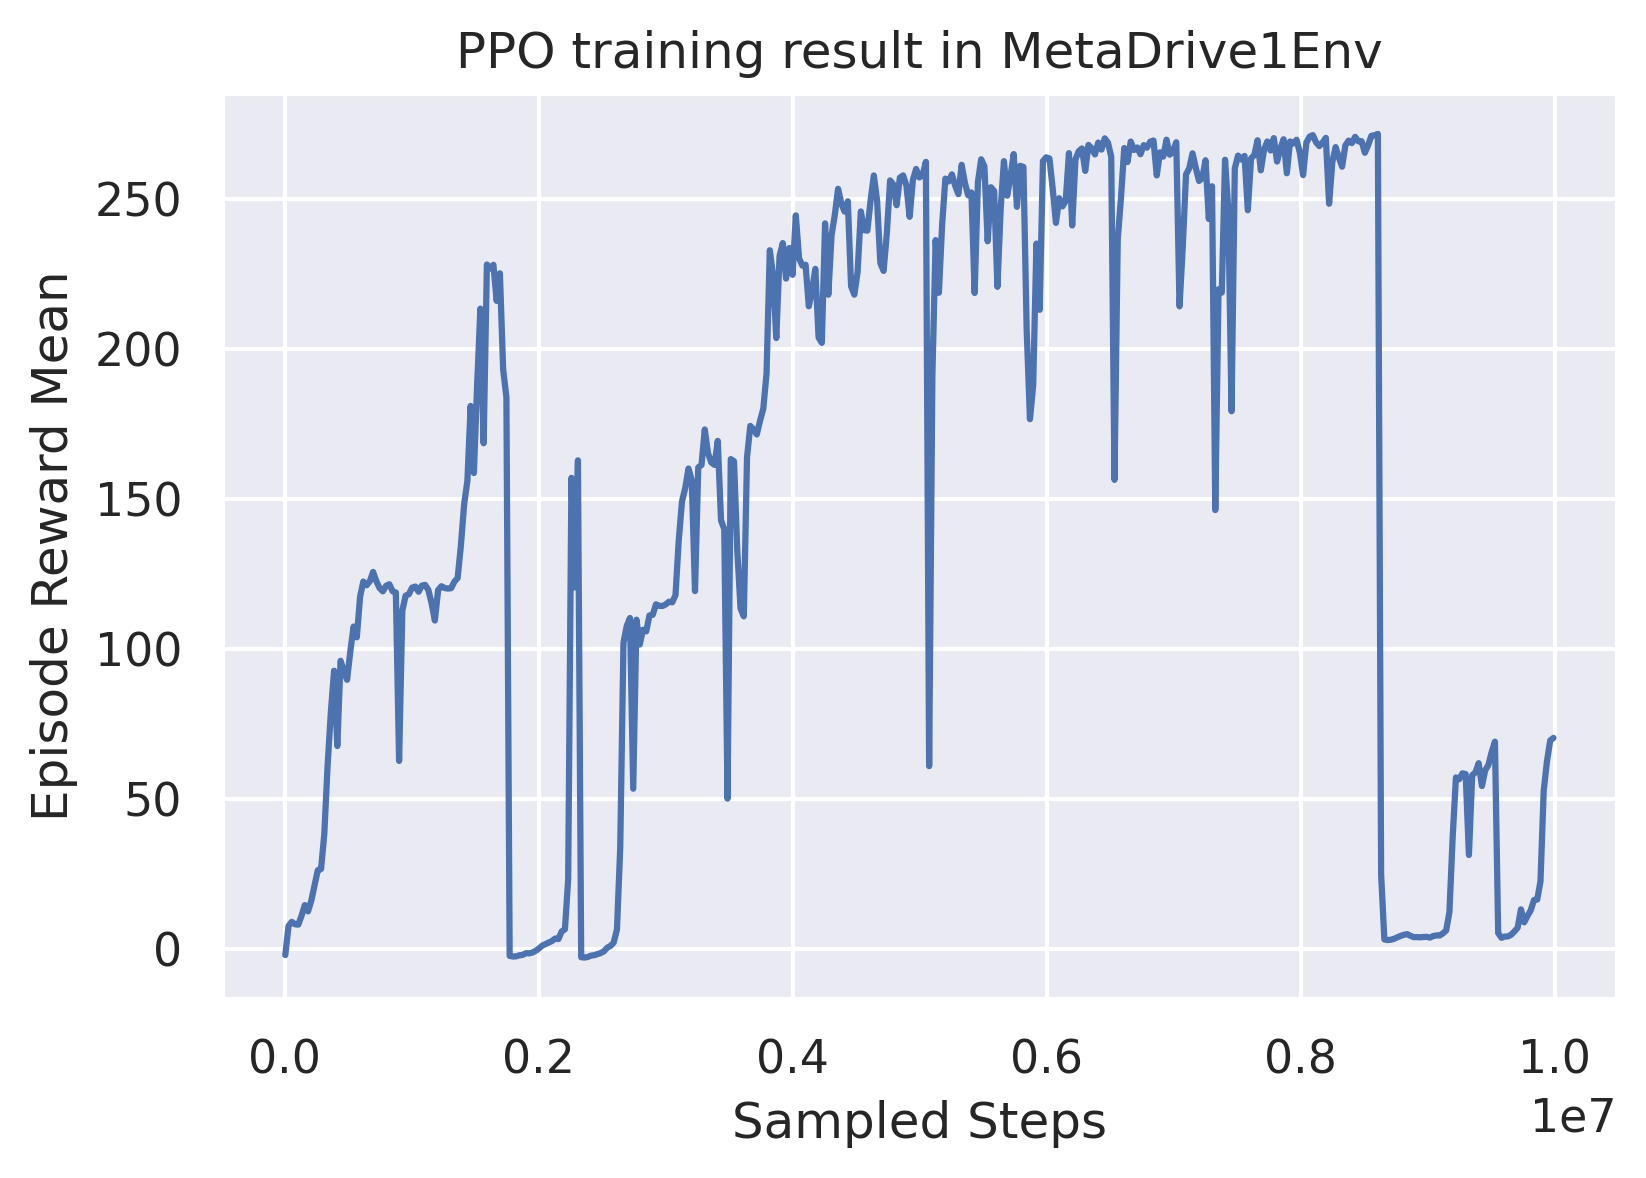

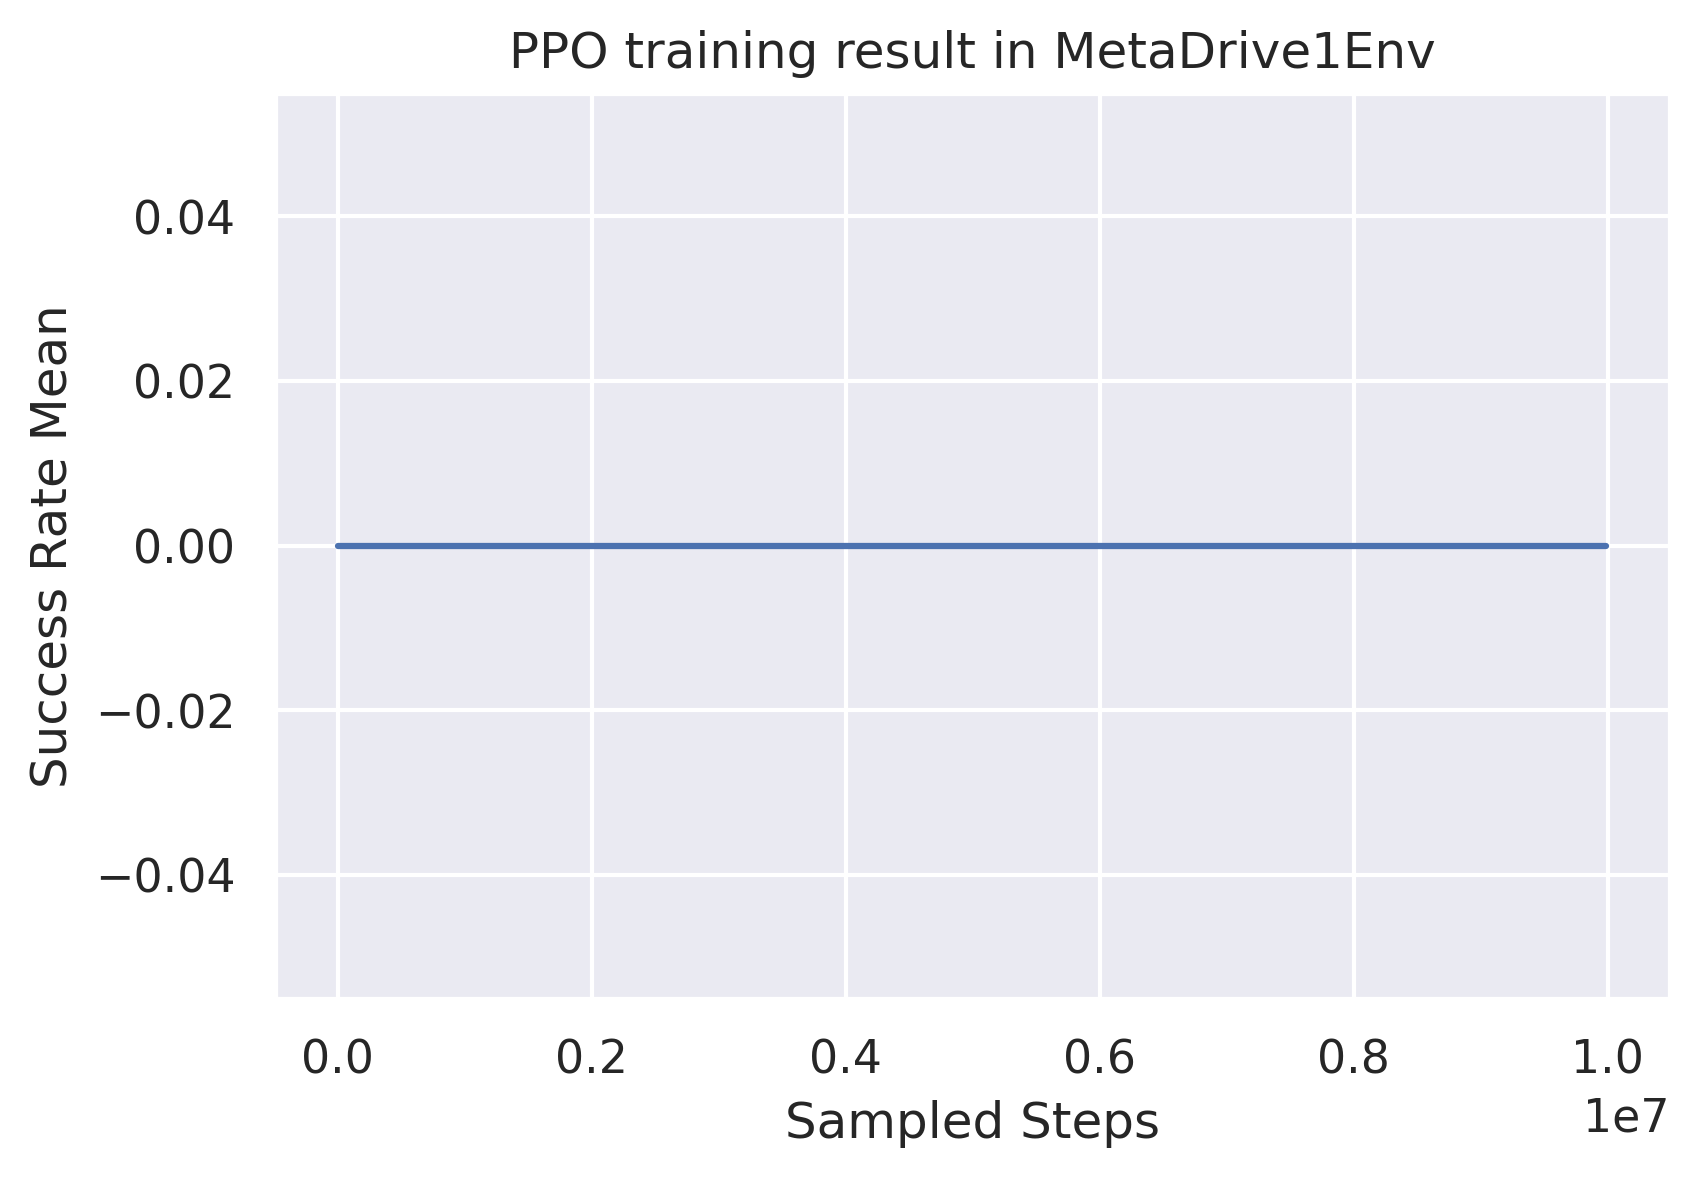

In [1]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("MetaDrive1Env/PPO")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("PPO training result in MetaDrive1Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("PPO training result in MetaDrive1Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.


Text(0.5, 0, 'Sampled Steps')

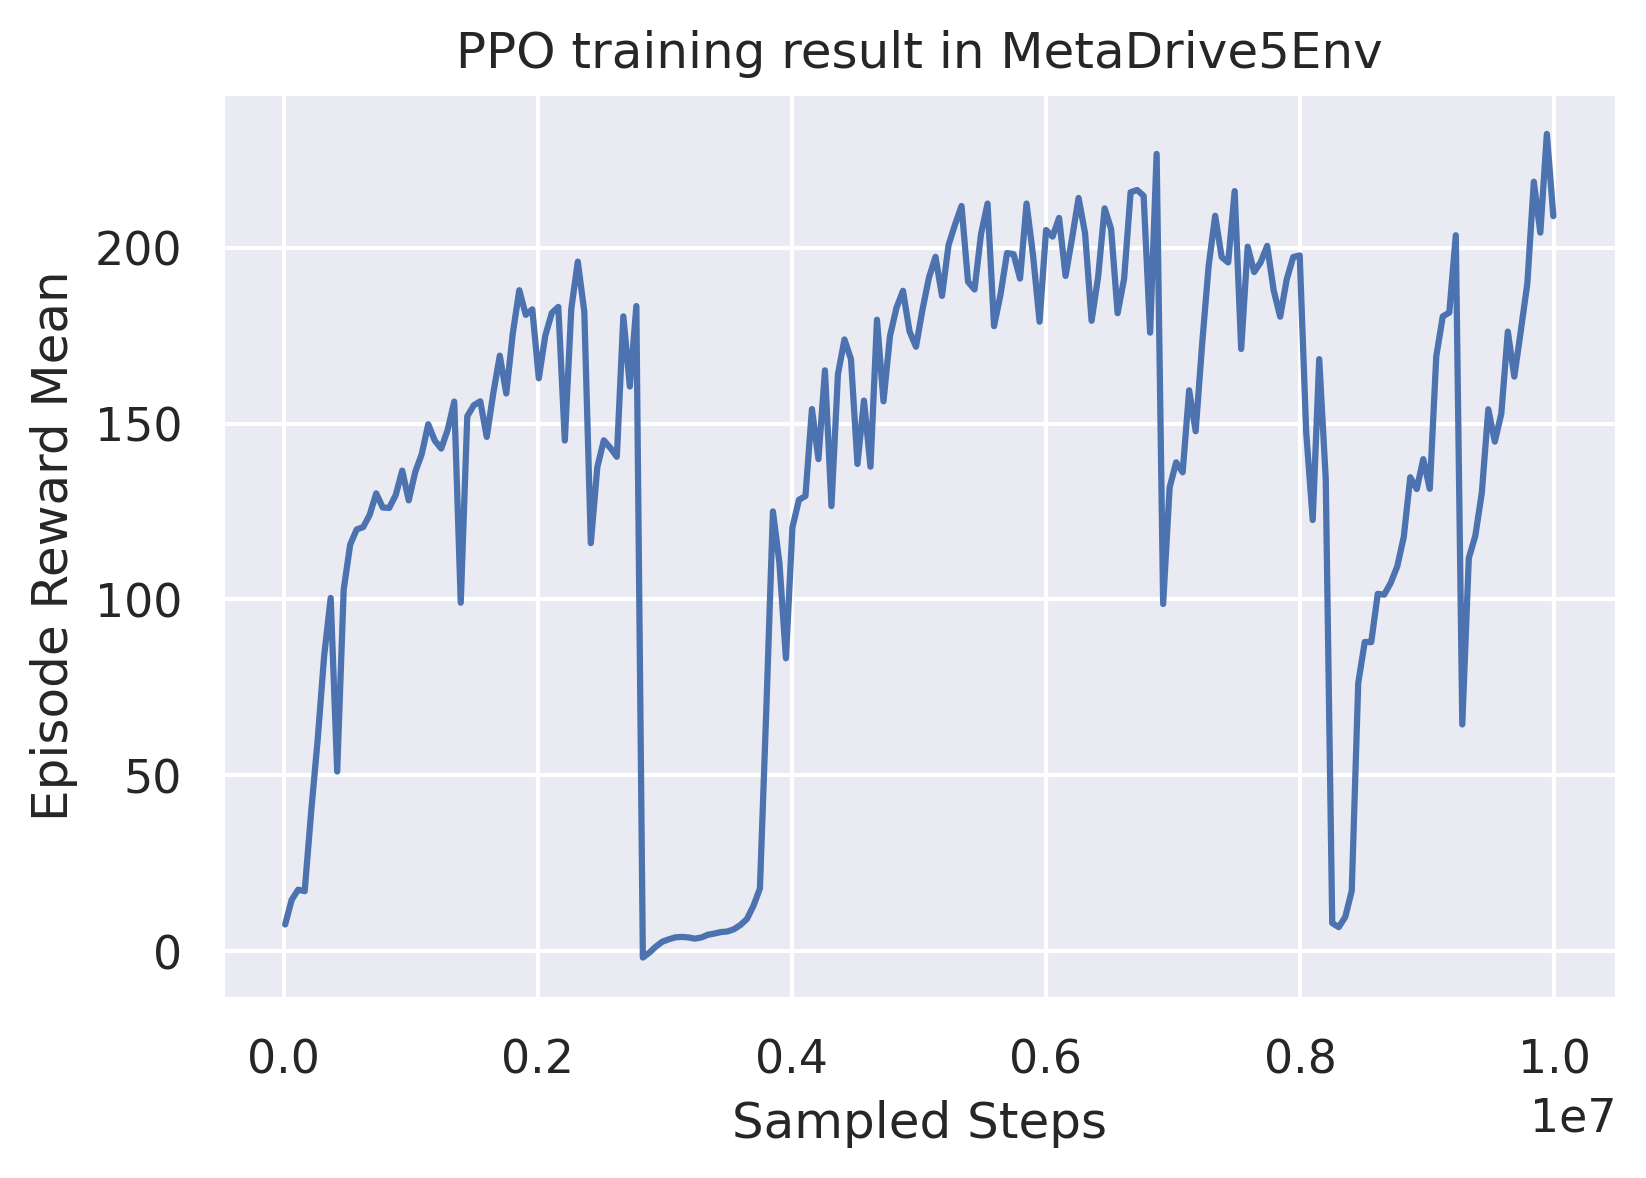

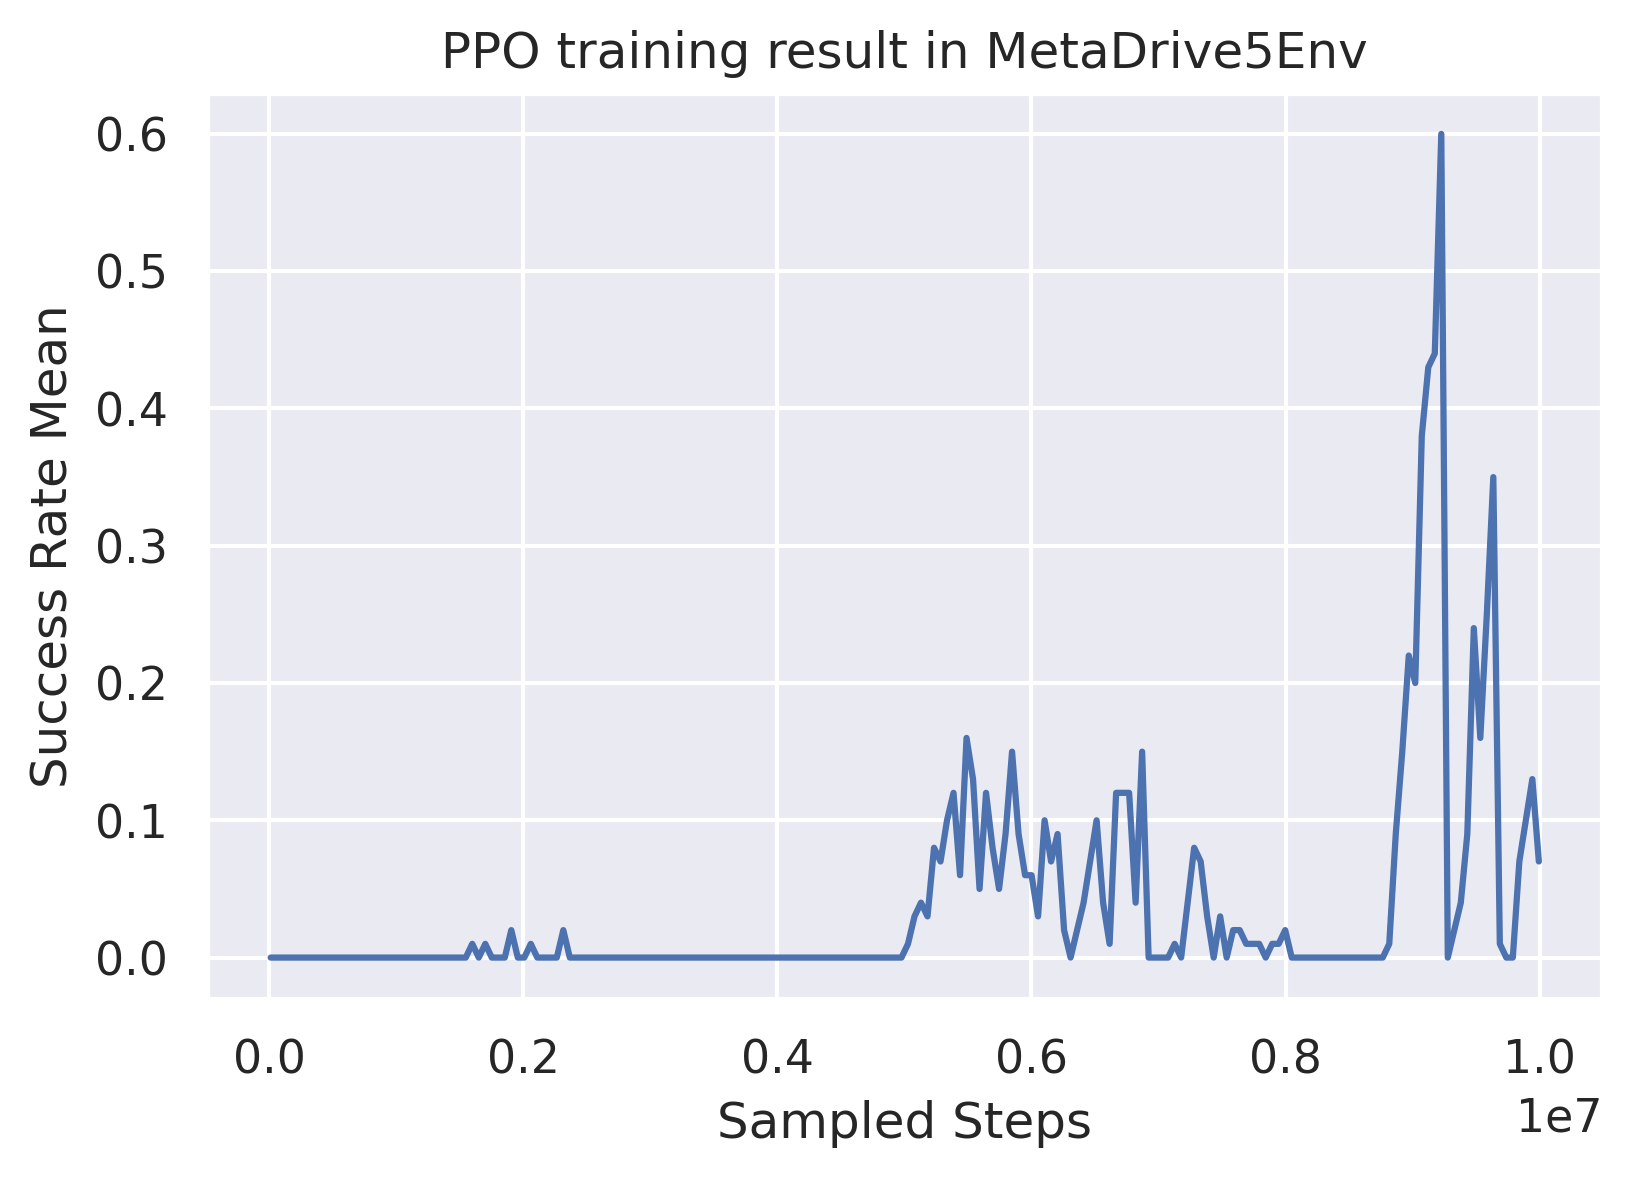

In [2]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("MetaDrive5Env/PPO")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("PPO training result in MetaDrive5Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("PPO training result in MetaDrive5Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.


Text(0.5, 0, 'Sampled Steps')

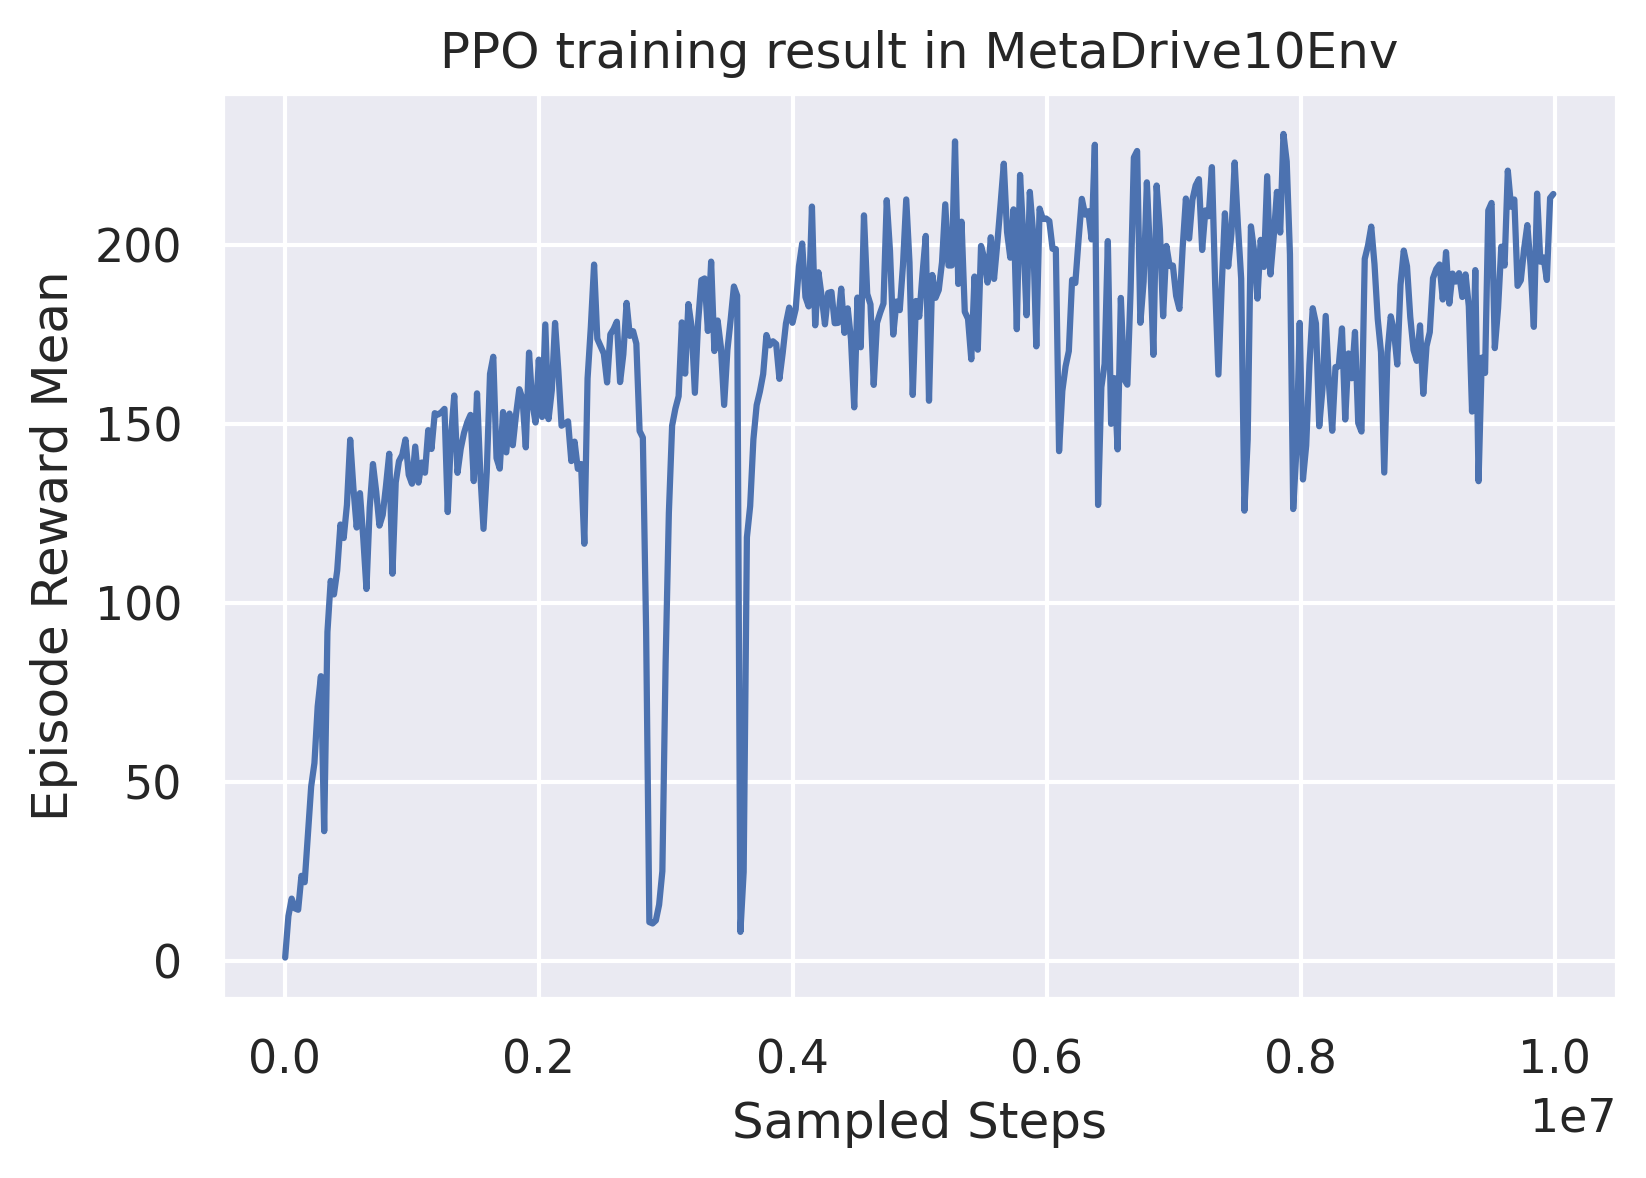

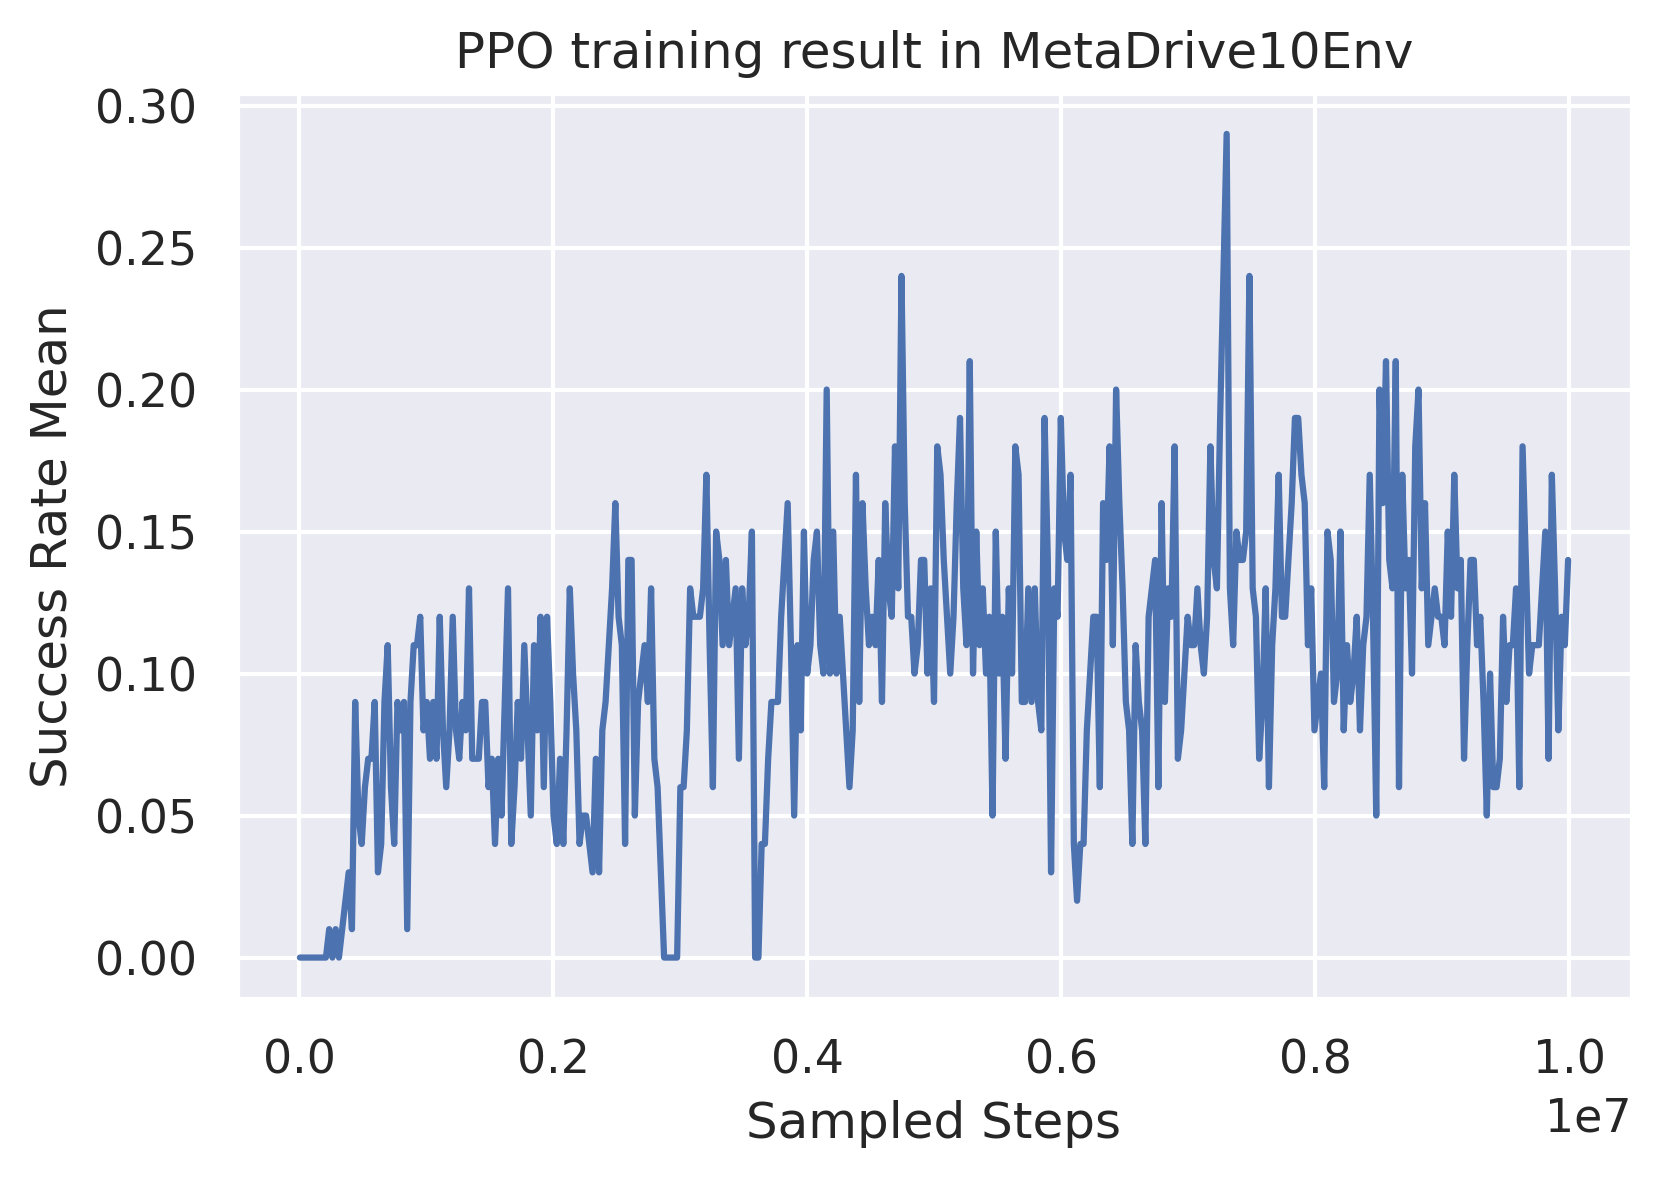

In [3]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("MetaDrive10Env/PPO")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("PPO training result in MetaDrive10Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("PPO training result in MetaDrive10Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.


Text(0.5, 0, 'Sampled Steps')

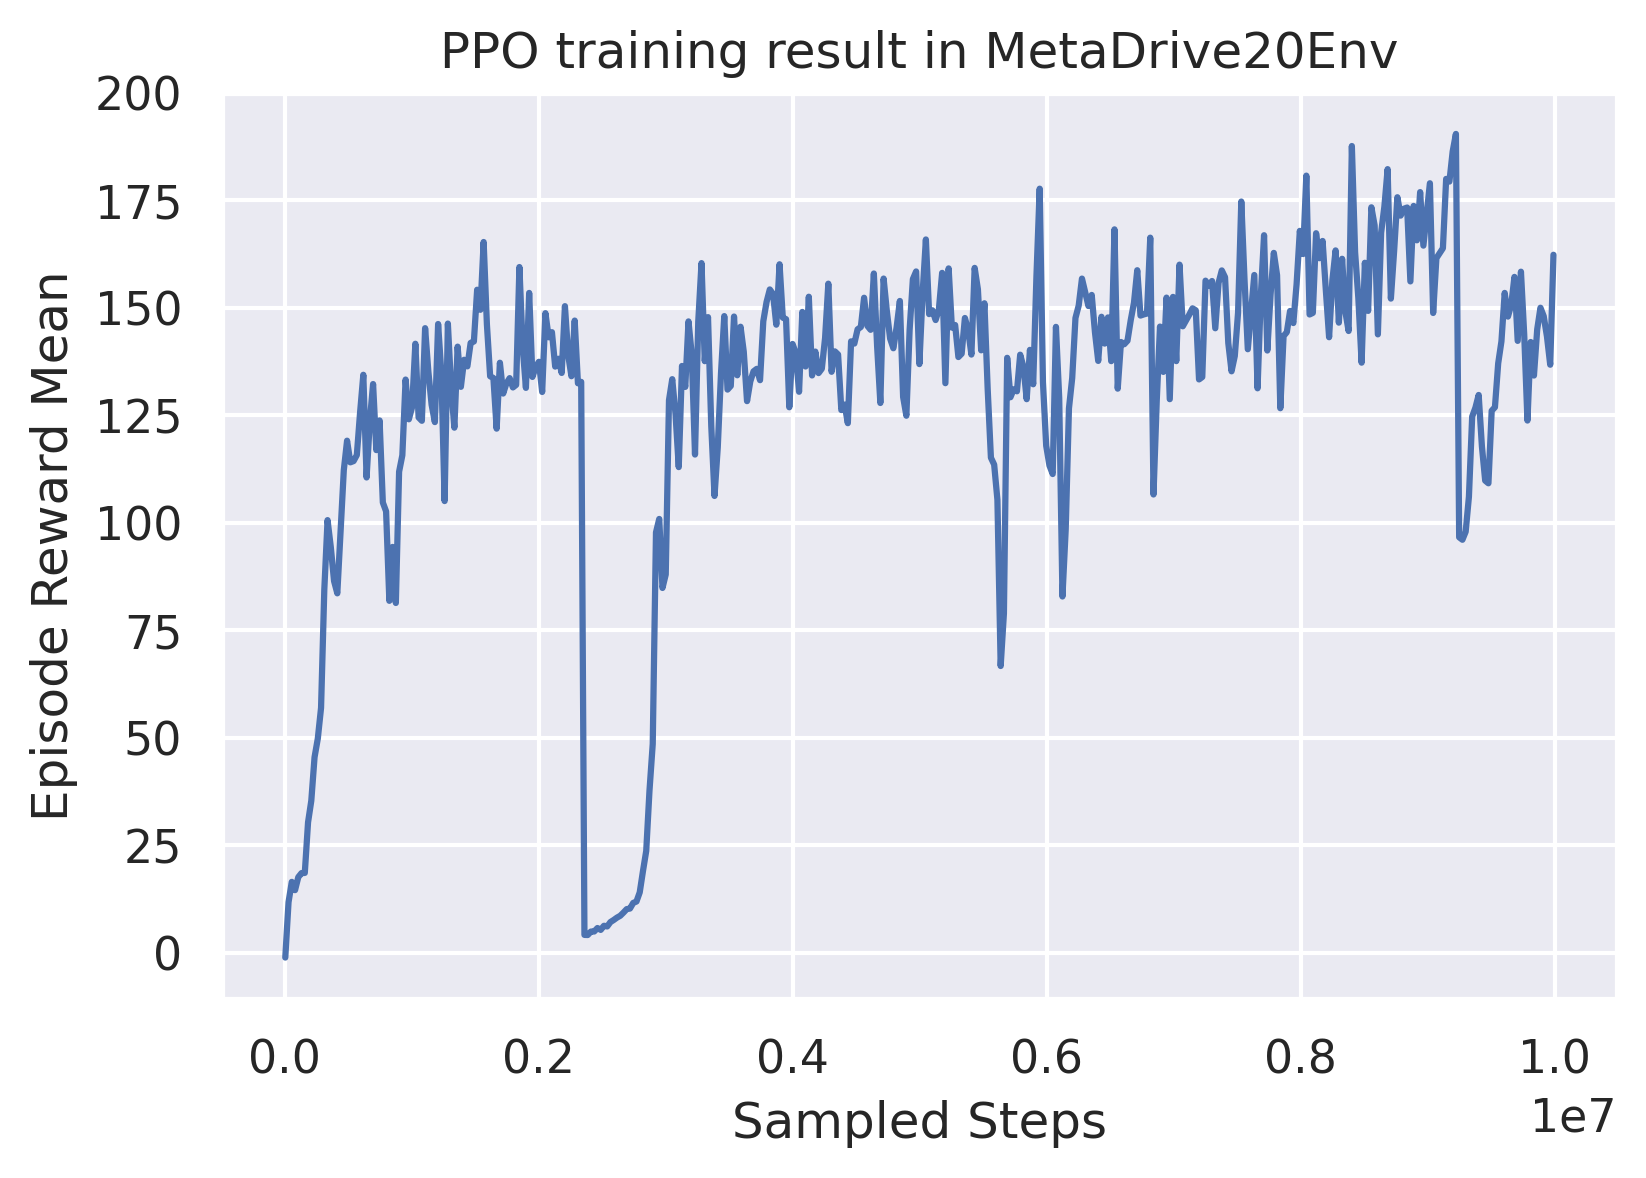

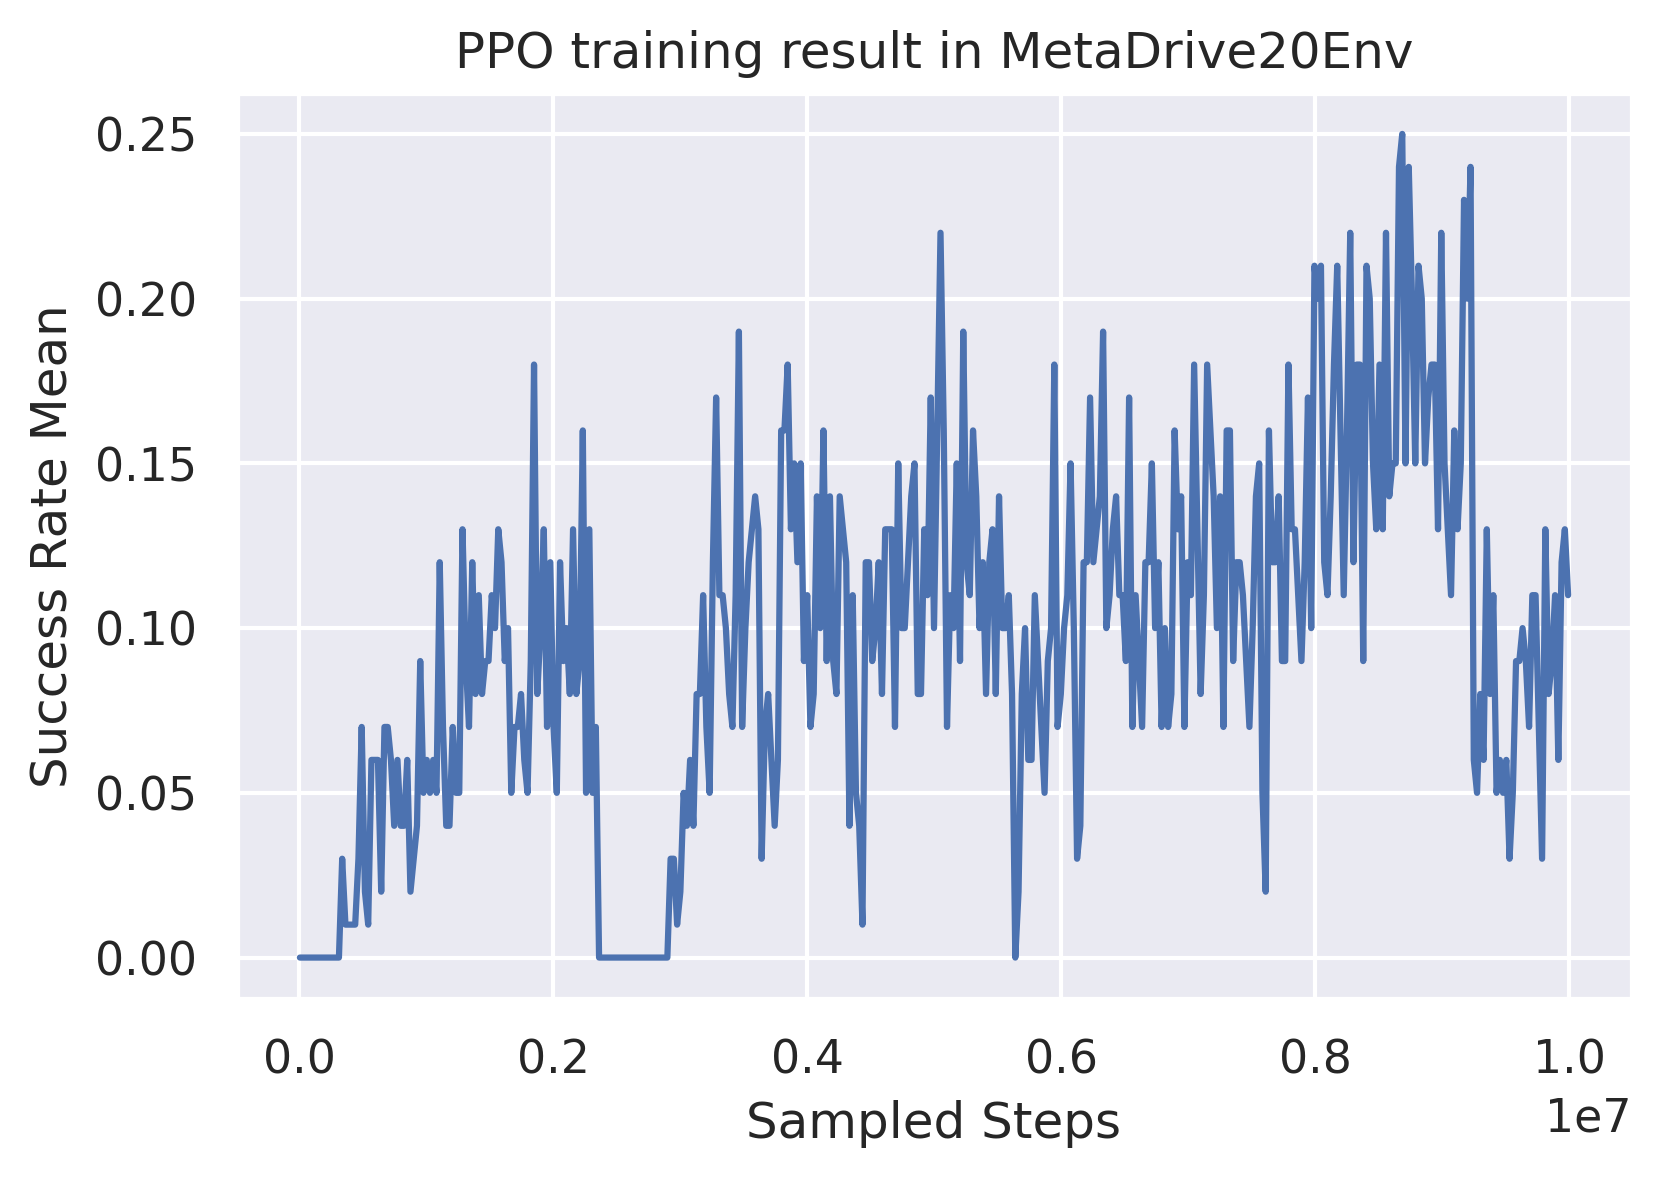

In [4]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("MetaDrive20Env/PPO")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("PPO training result in MetaDrive20Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("PPO training result in MetaDrive20Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.


Text(0.5, 0, 'Sampled Steps')

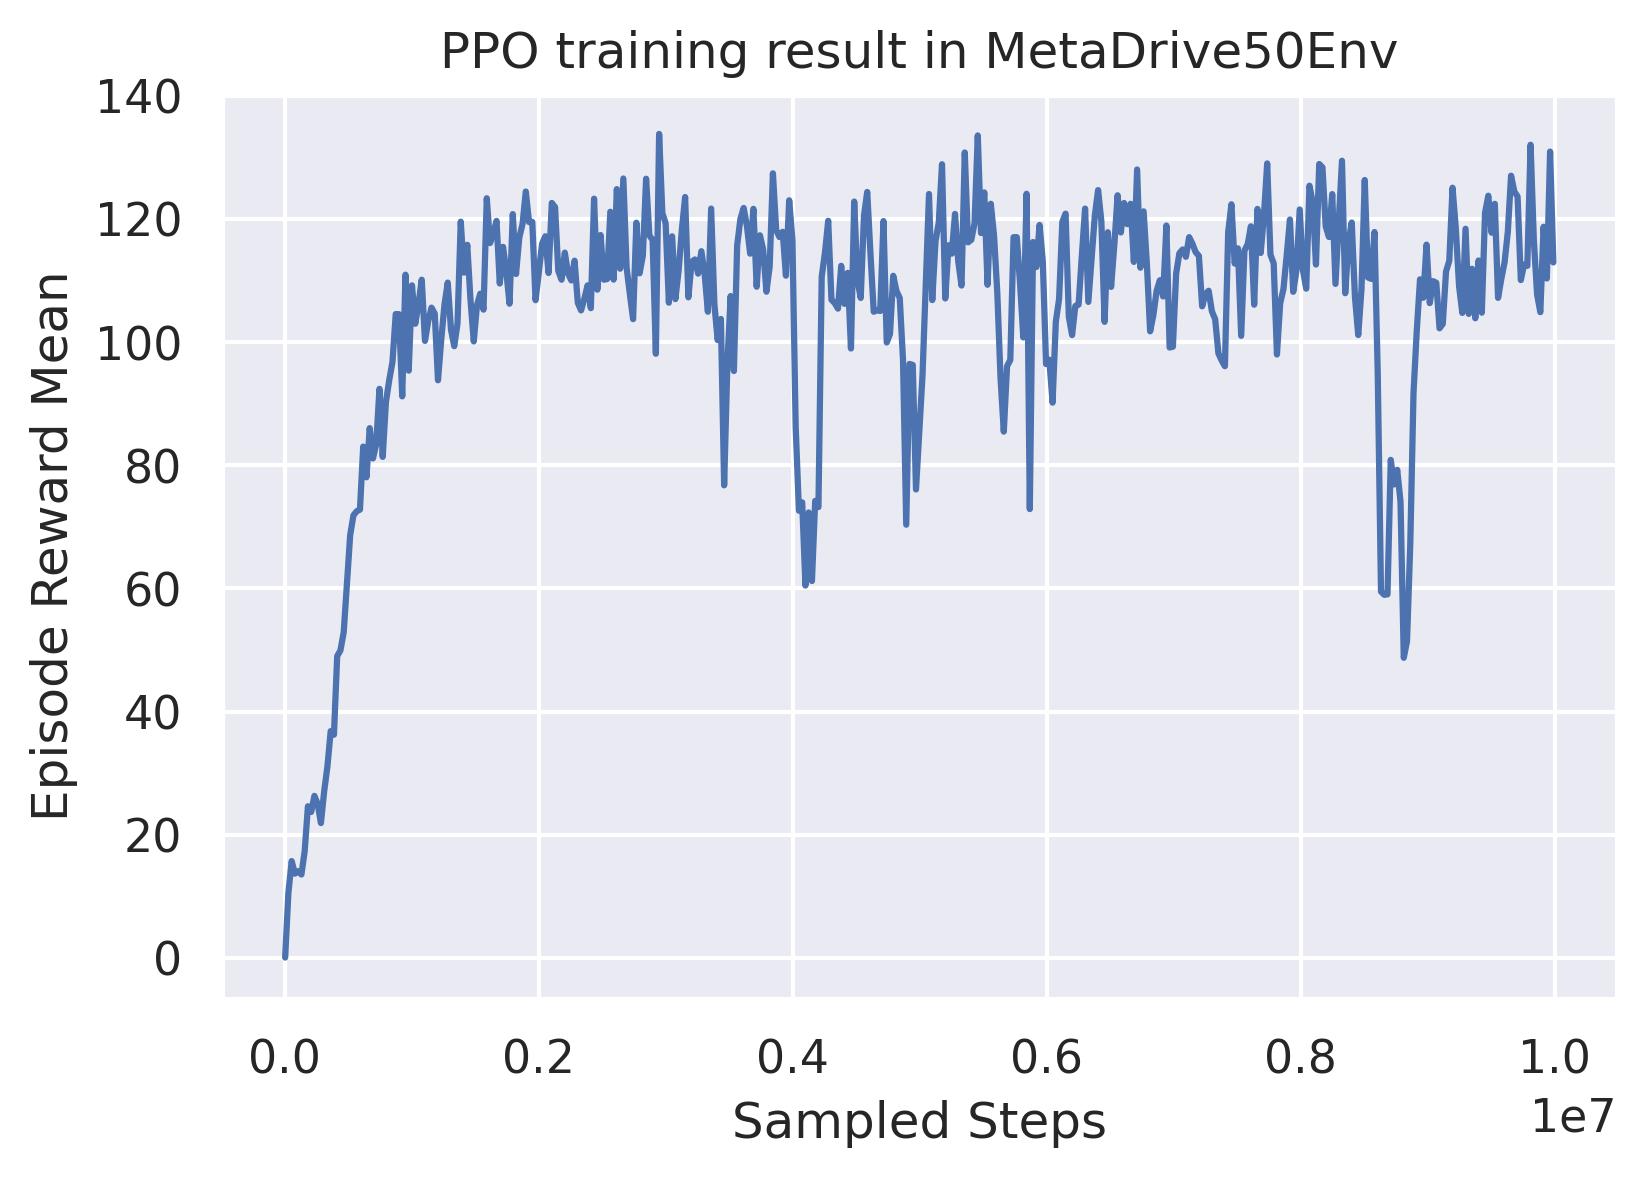

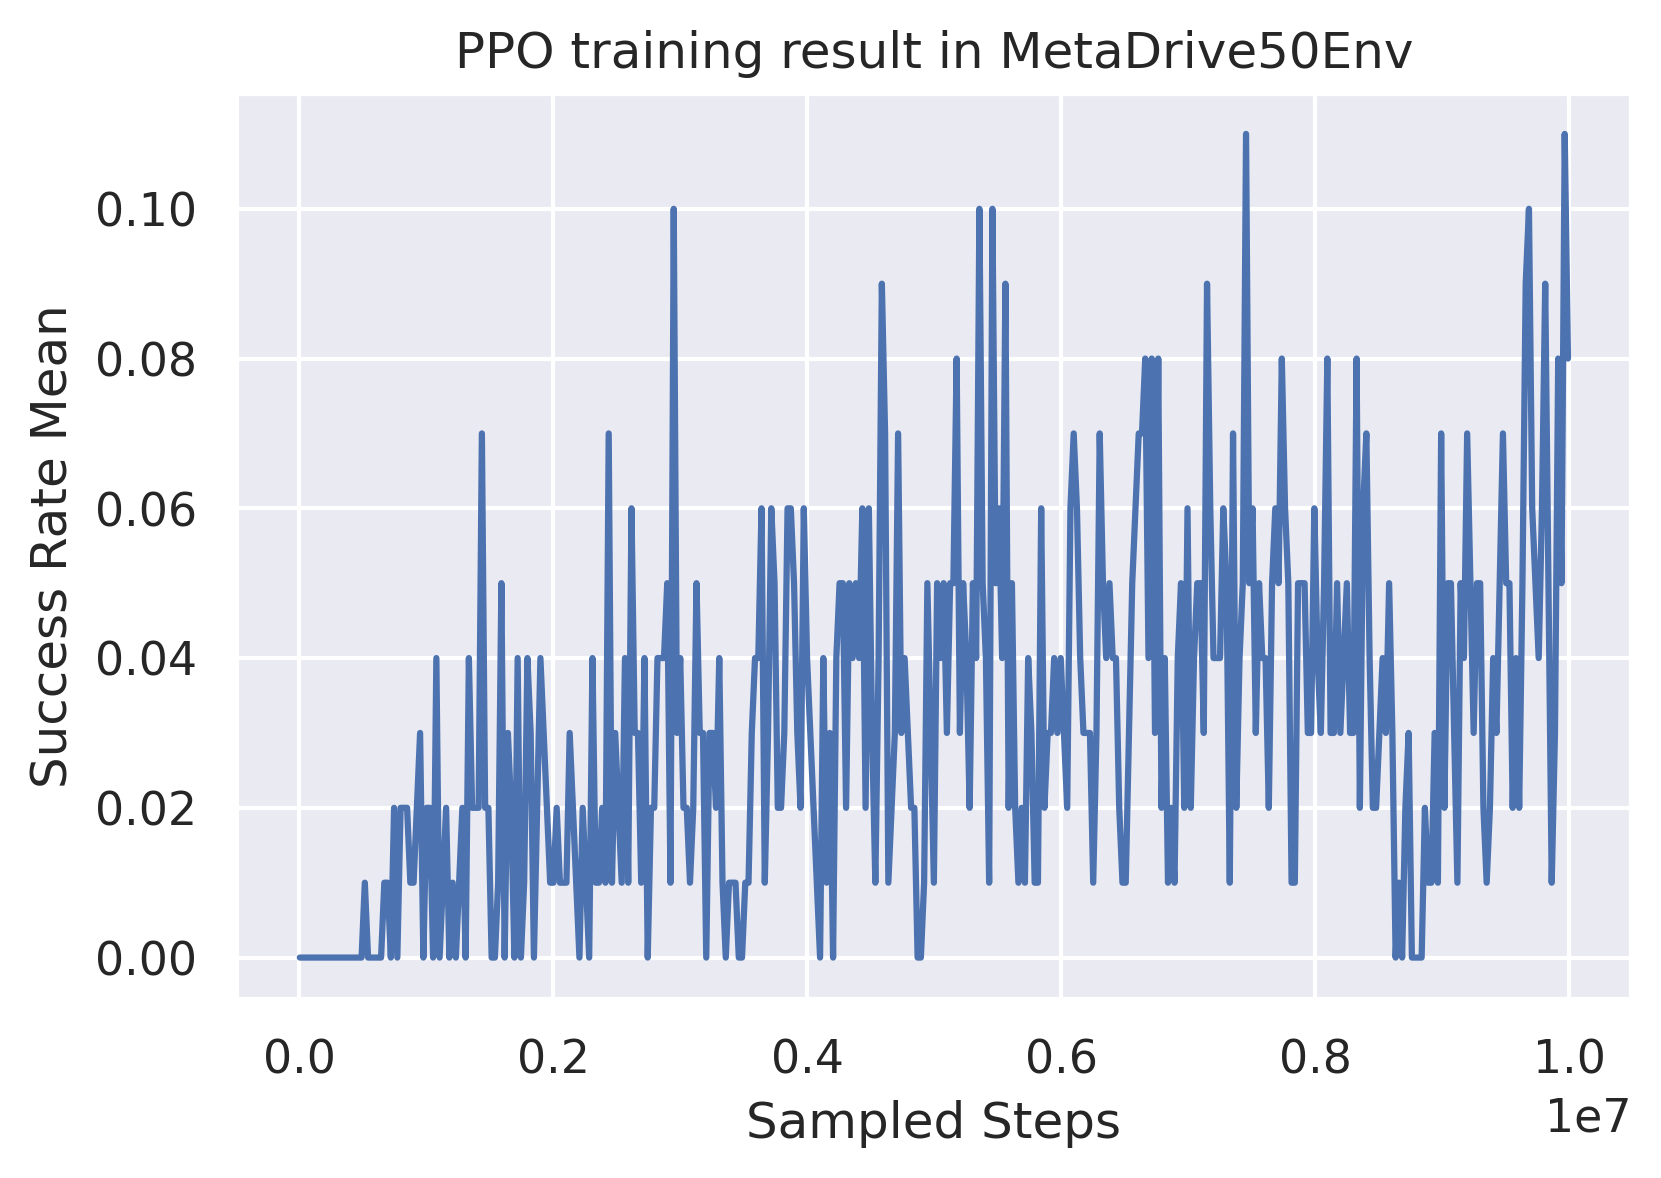

In [5]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("MetaDrive50Env/PPO")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("PPO training result in MetaDrive50Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("PPO training result in MetaDrive50Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.

Text(0.5, 0, 'Sampled Steps')

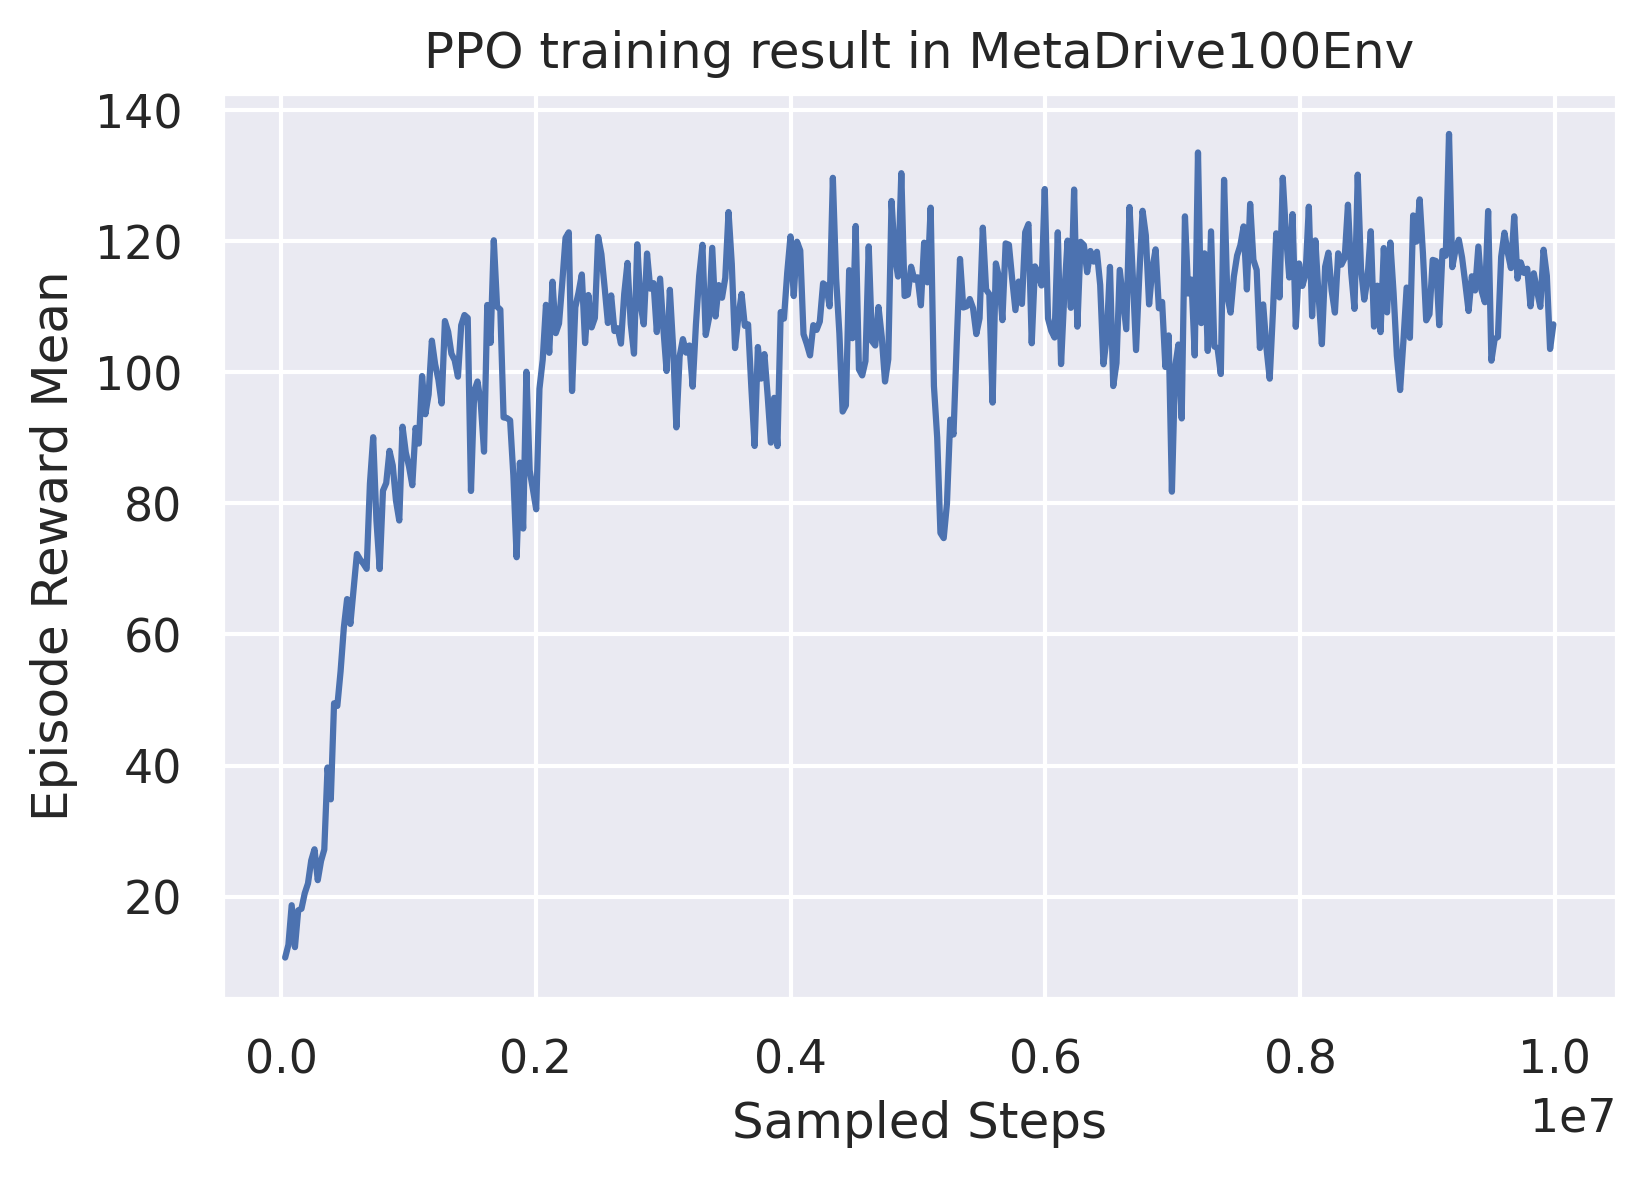

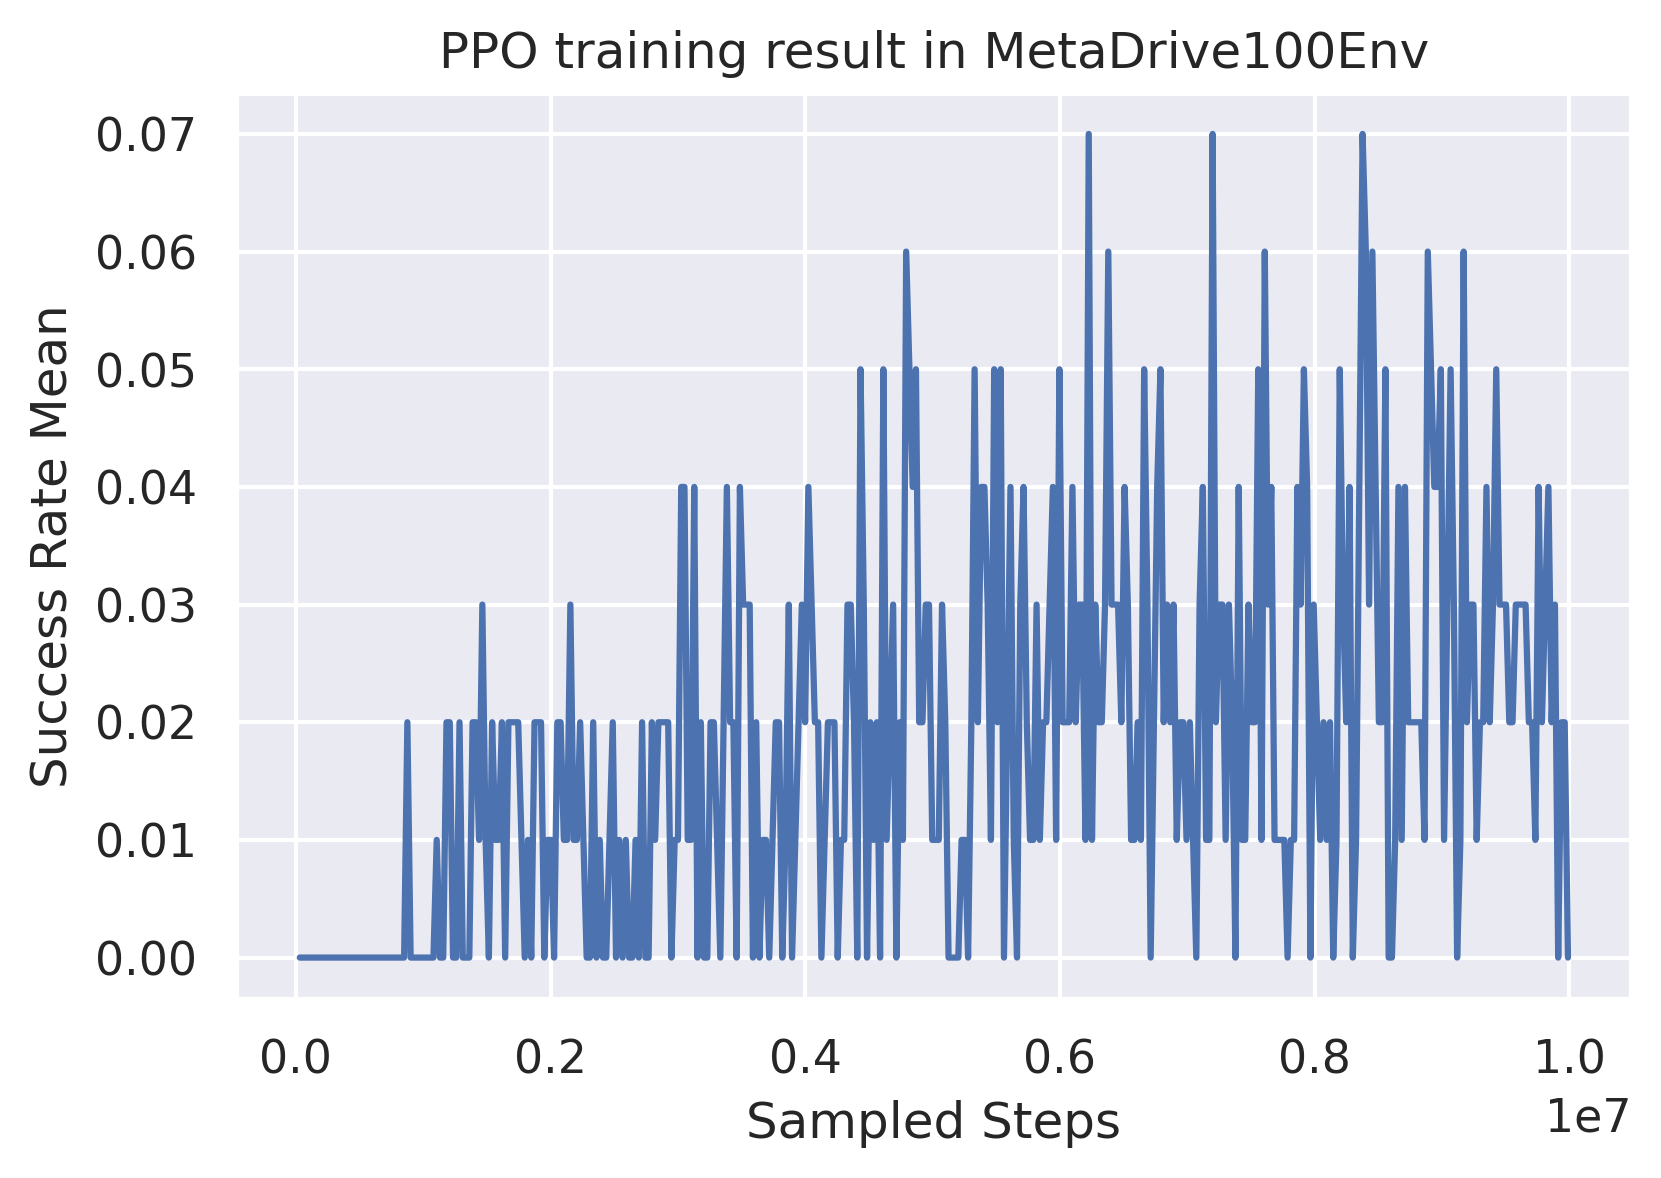

In [6]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = load_progress("MetaDrive100Env/PPO")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("PPO training result in MetaDrive100Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("PPO training result in MetaDrive100Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.

In [5]:
### TD3 on MetaDrive Environments

Text(0.5, 0, 'Sampled Steps')

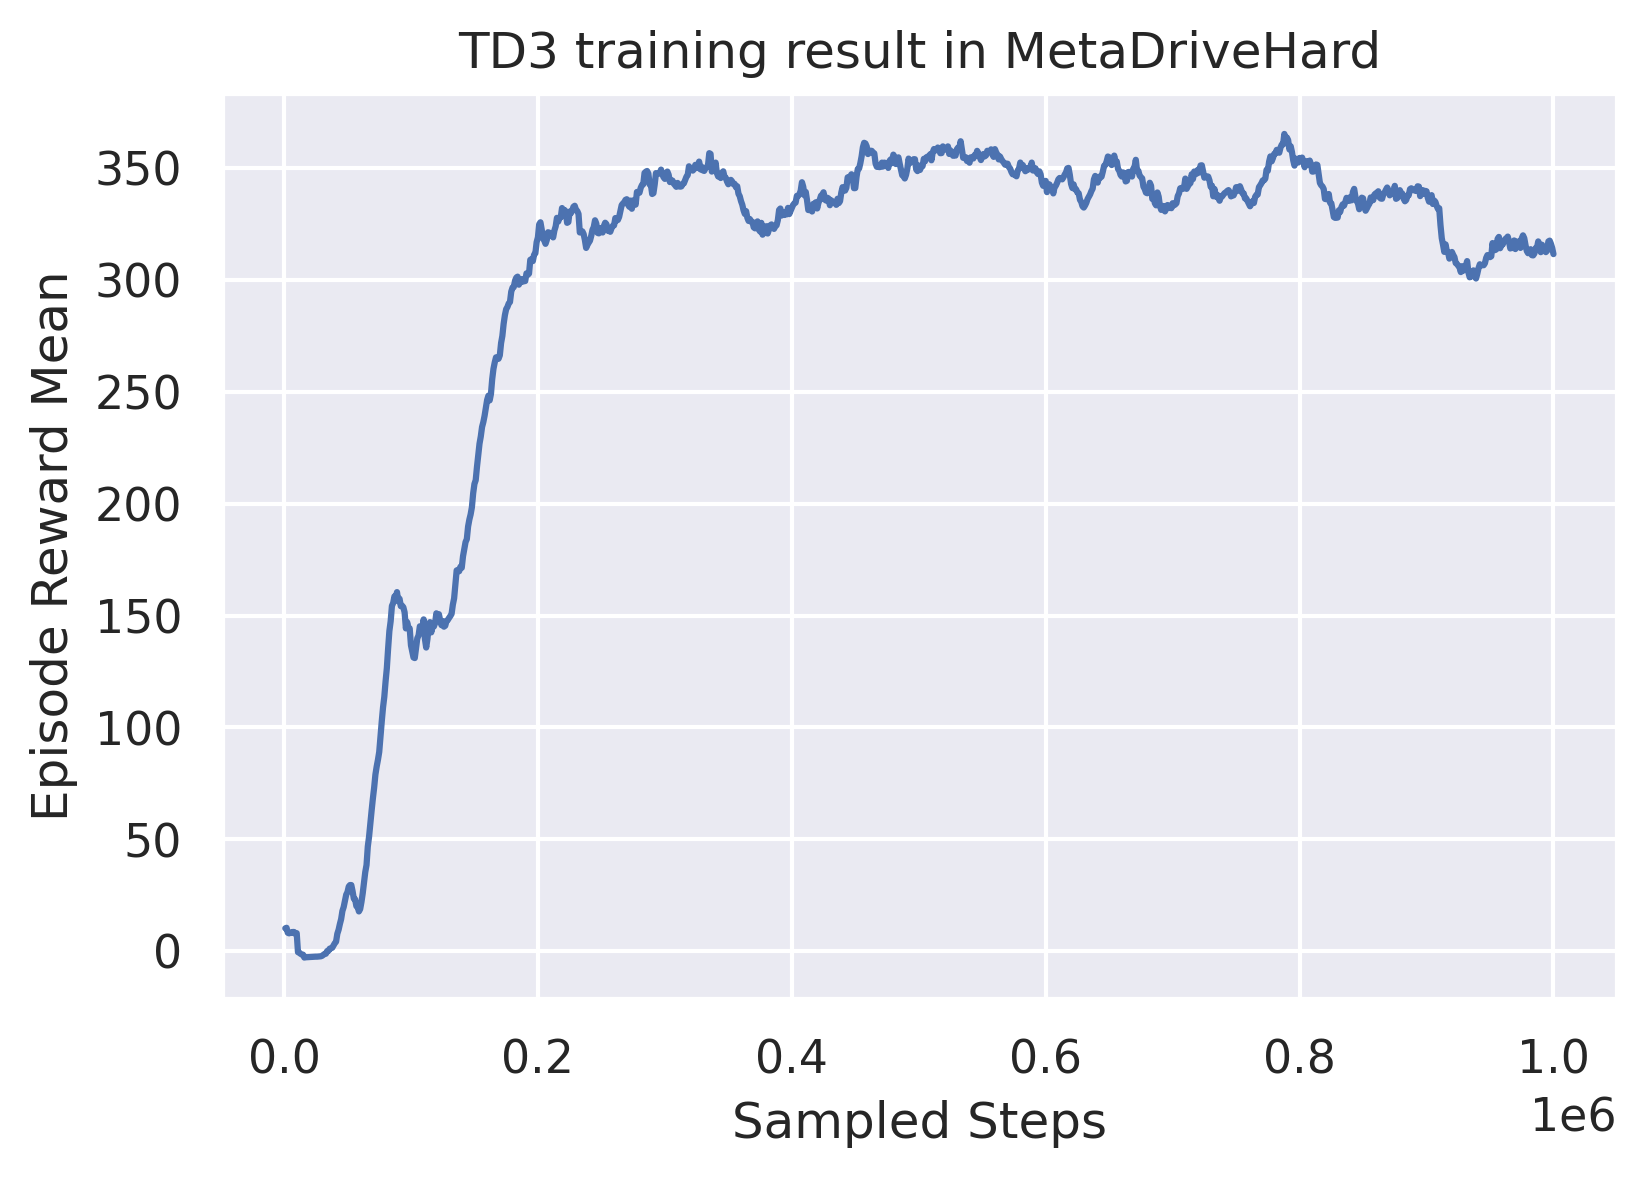

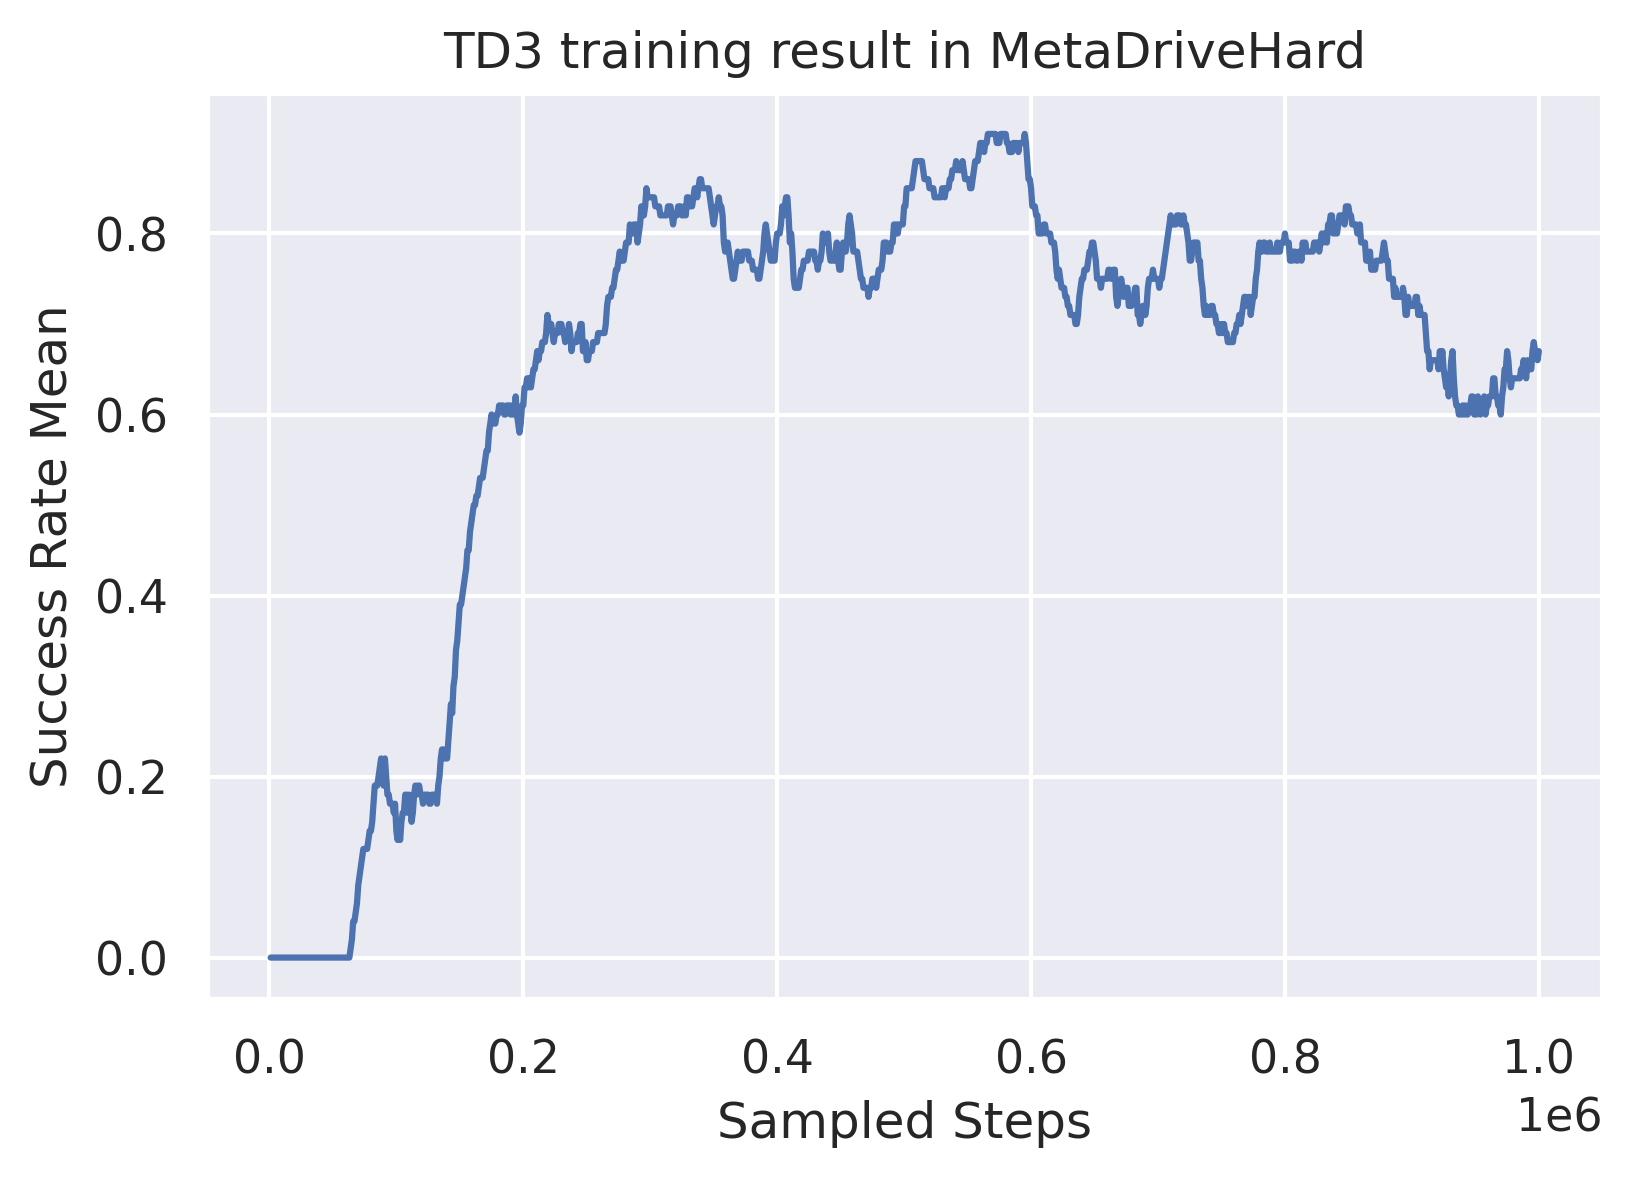

In [1]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

td3_progress = load_progress("MetaDriveHard/TD3/data")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("TD3 training result in MetaDriveHard")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("TD3 training result in MetaDriveHard")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.


Text(0.5, 0, 'Sampled Steps')

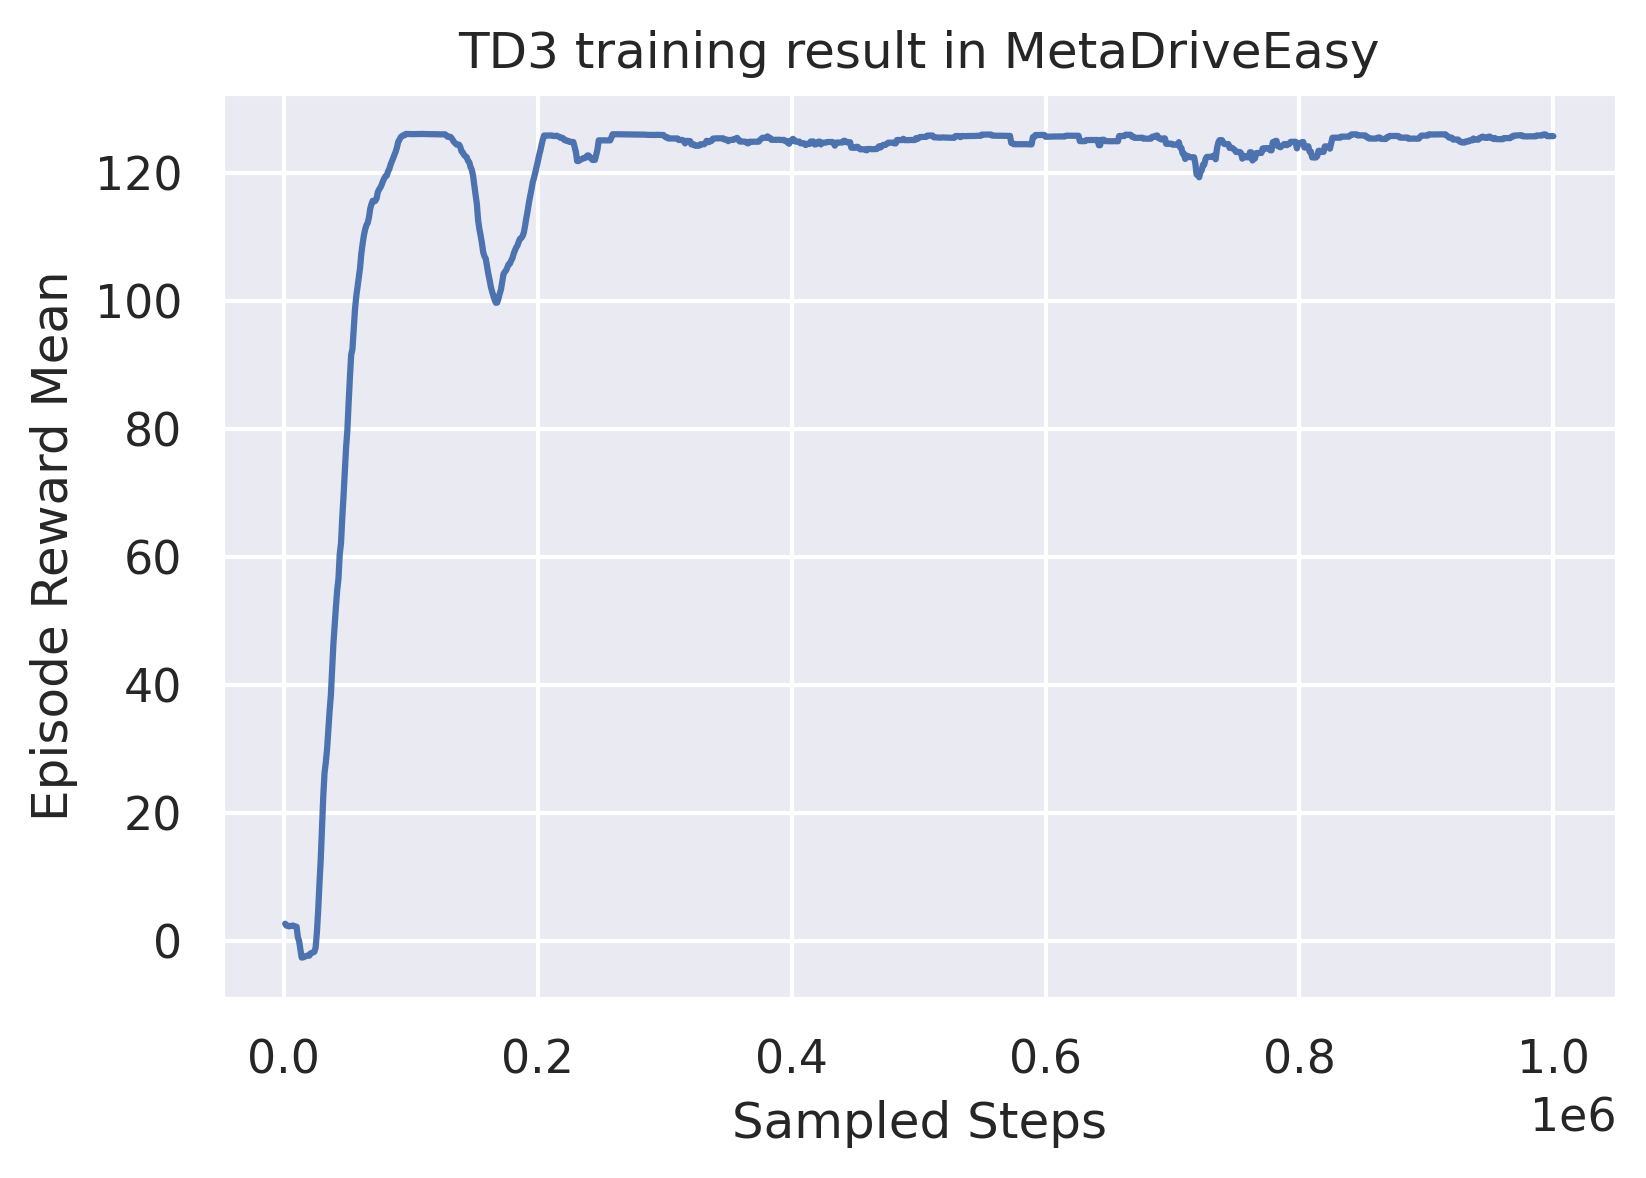

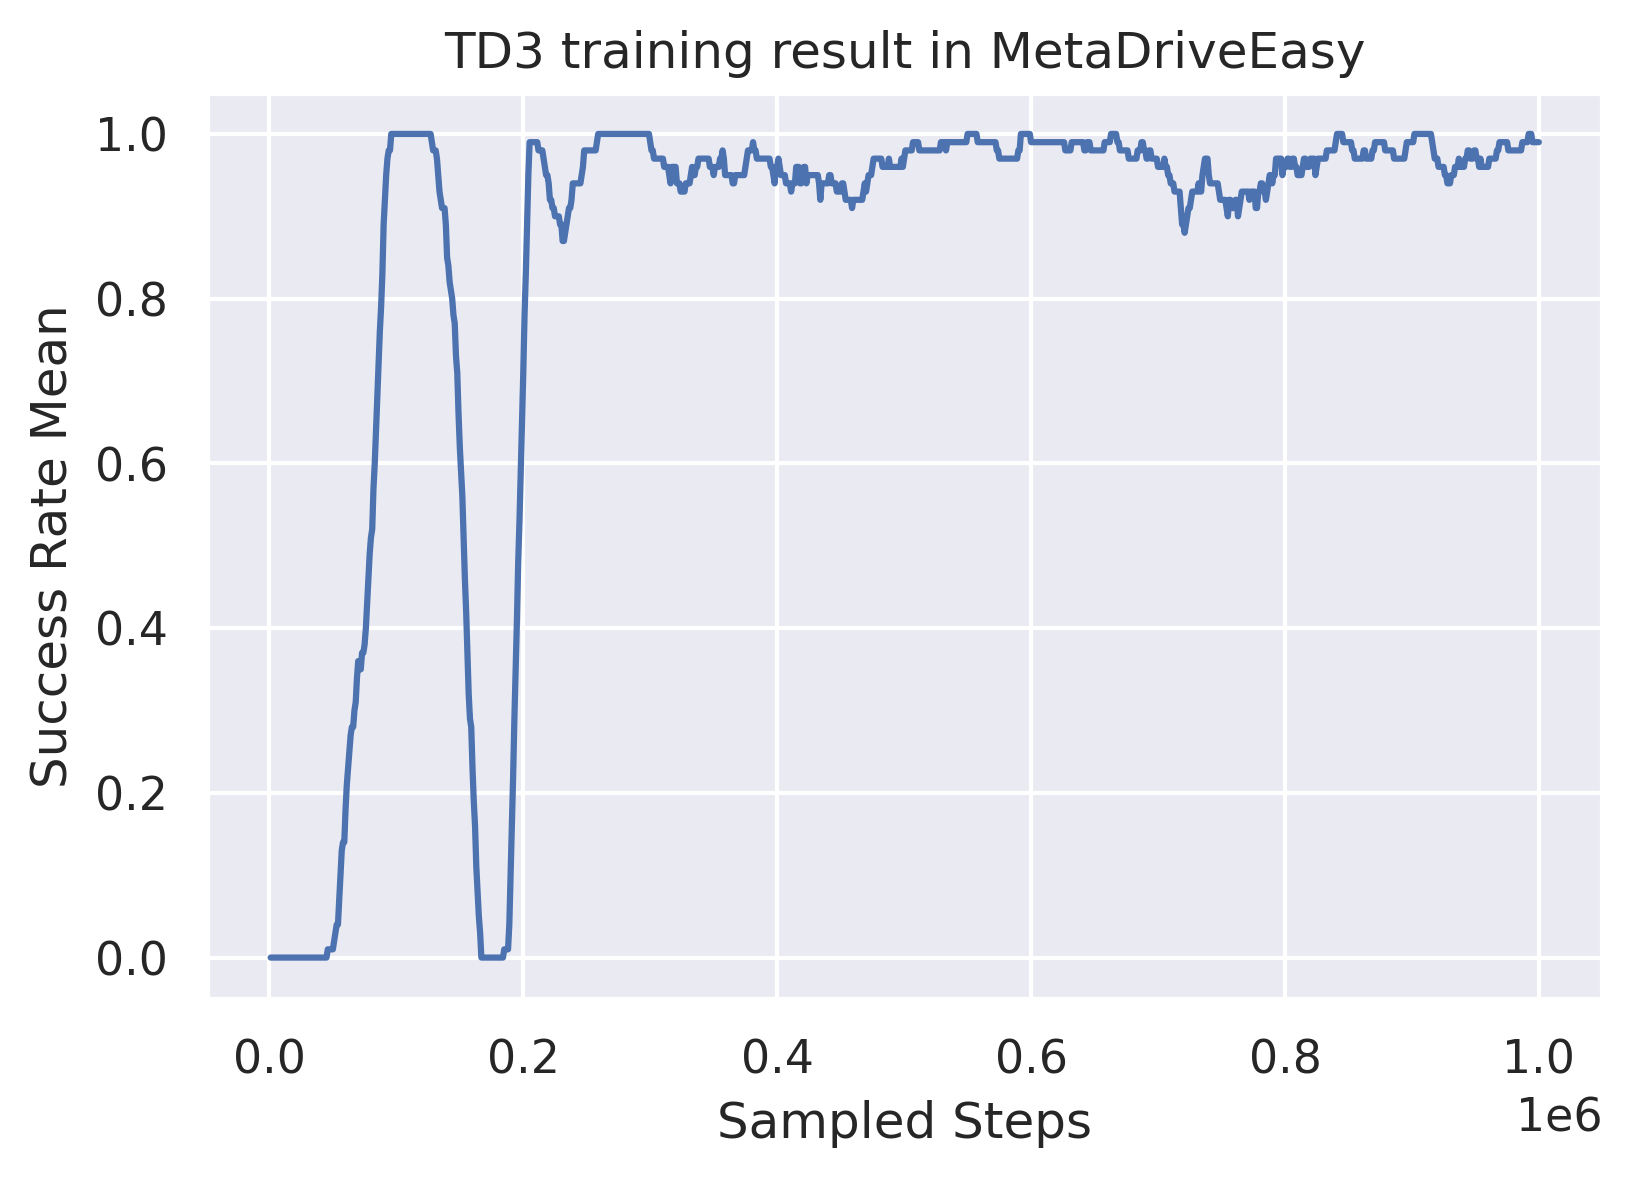

In [8]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

td3_progress = load_progress("data")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("TD3 training result in MetaDriveEasy")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("TD3 training result in MetaDriveEasy")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

# Note: The following figure is for reference used only, you don't have to repreduce it.


Text(0.5, 0, 'Sampled Steps')

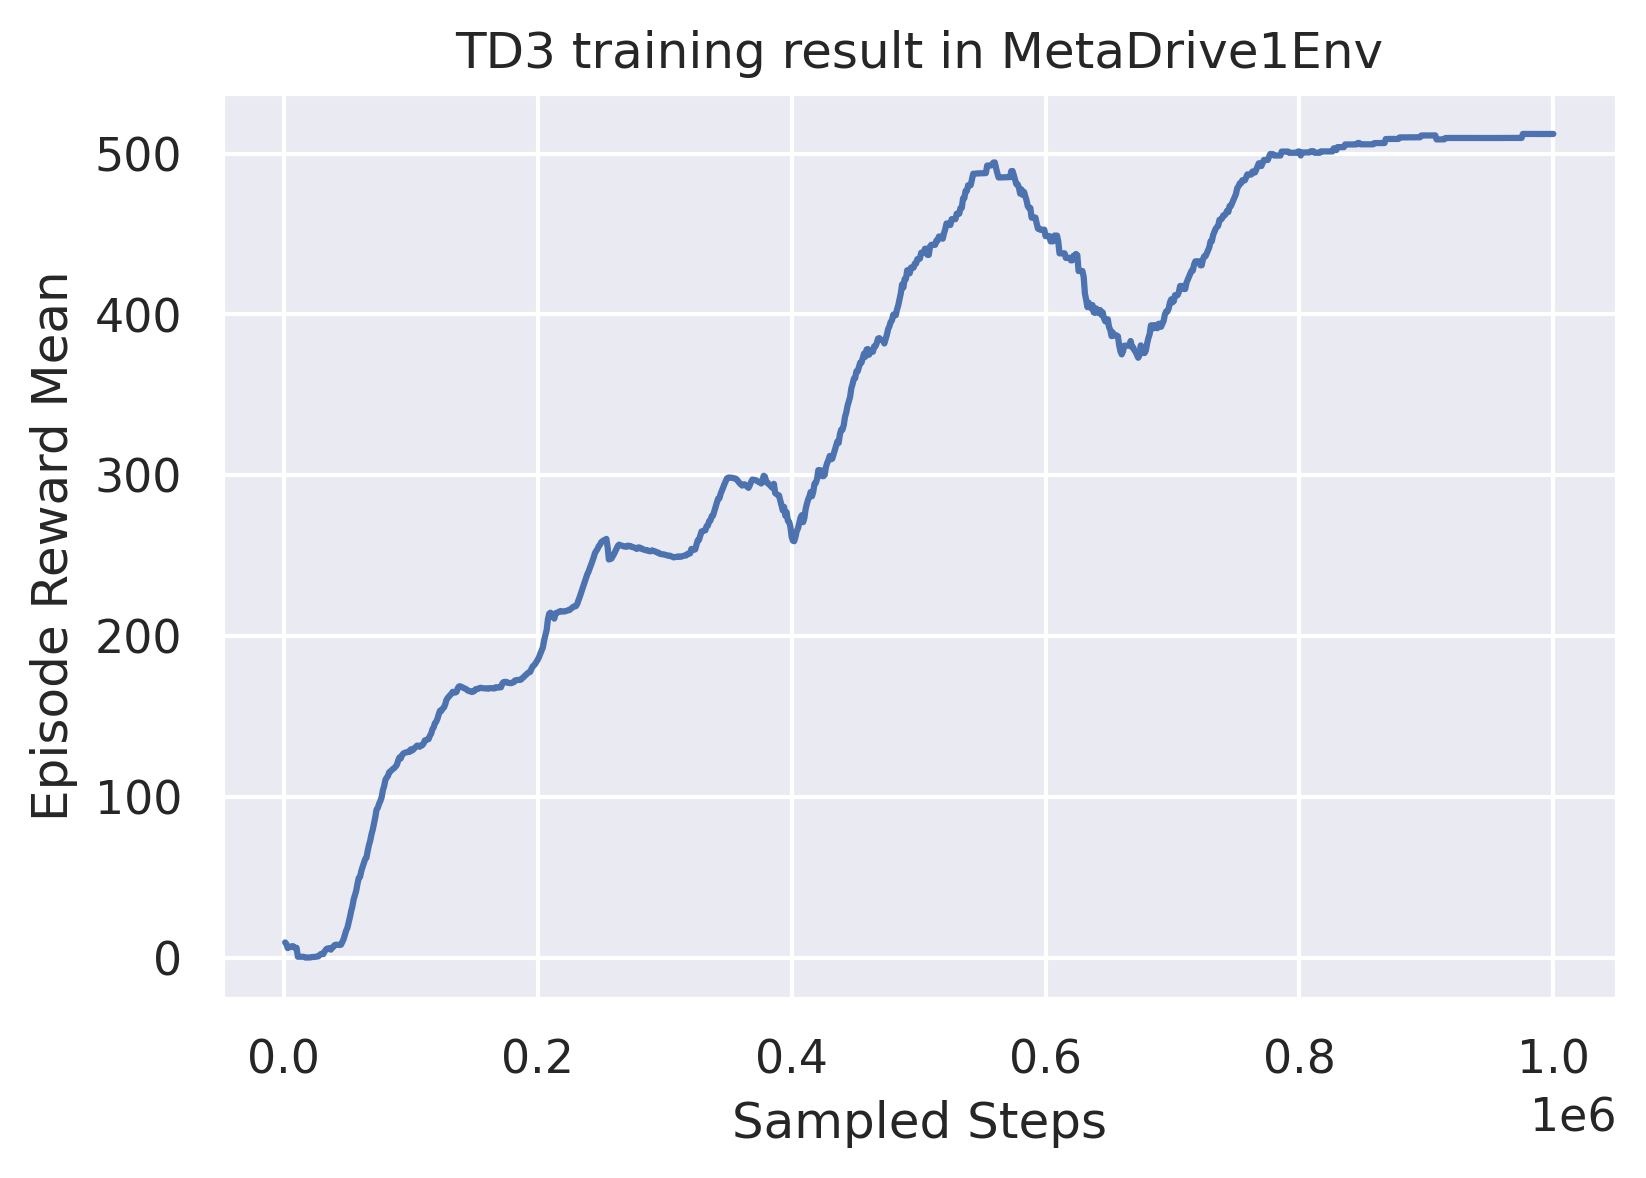

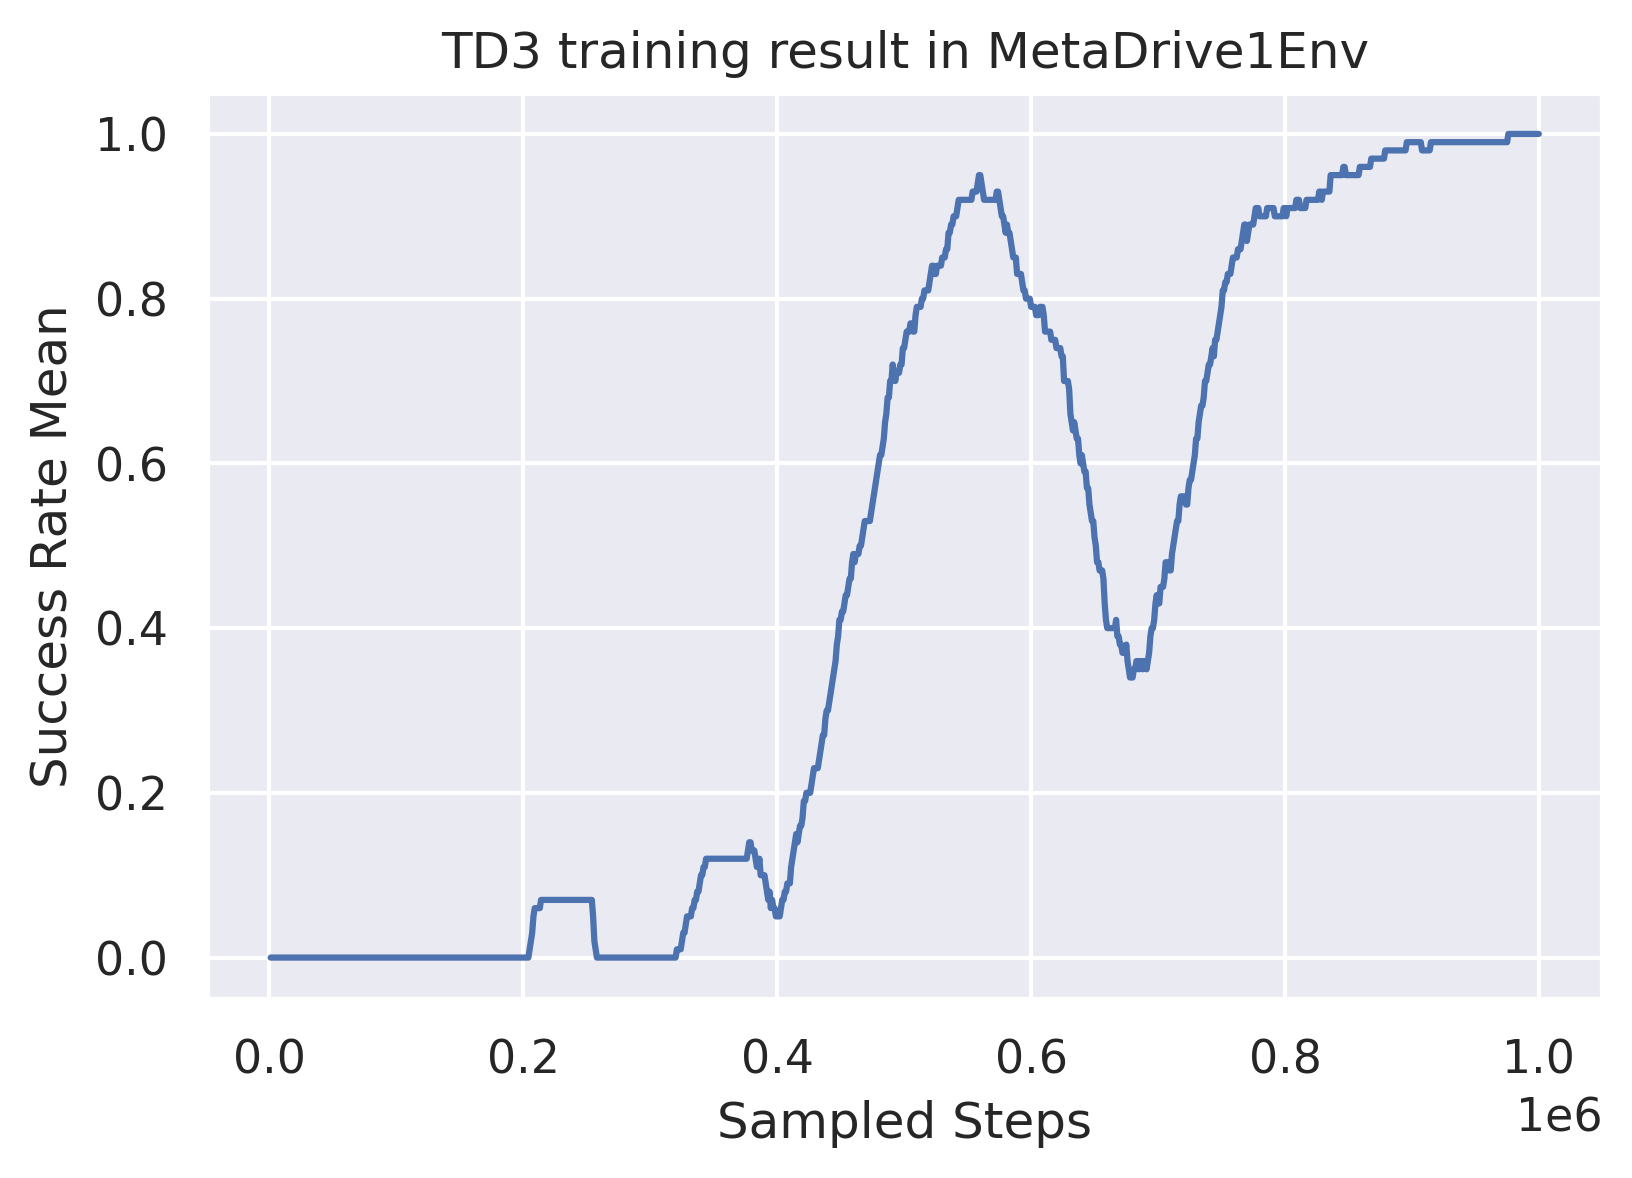

In [9]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

td3_progress = load_progress("MetaDrive1Env/TD3/data")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("TD3 training result in MetaDrive1Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("TD3 training result in MetaDrive1Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")

Text(0.5, 0, 'Sampled Steps')

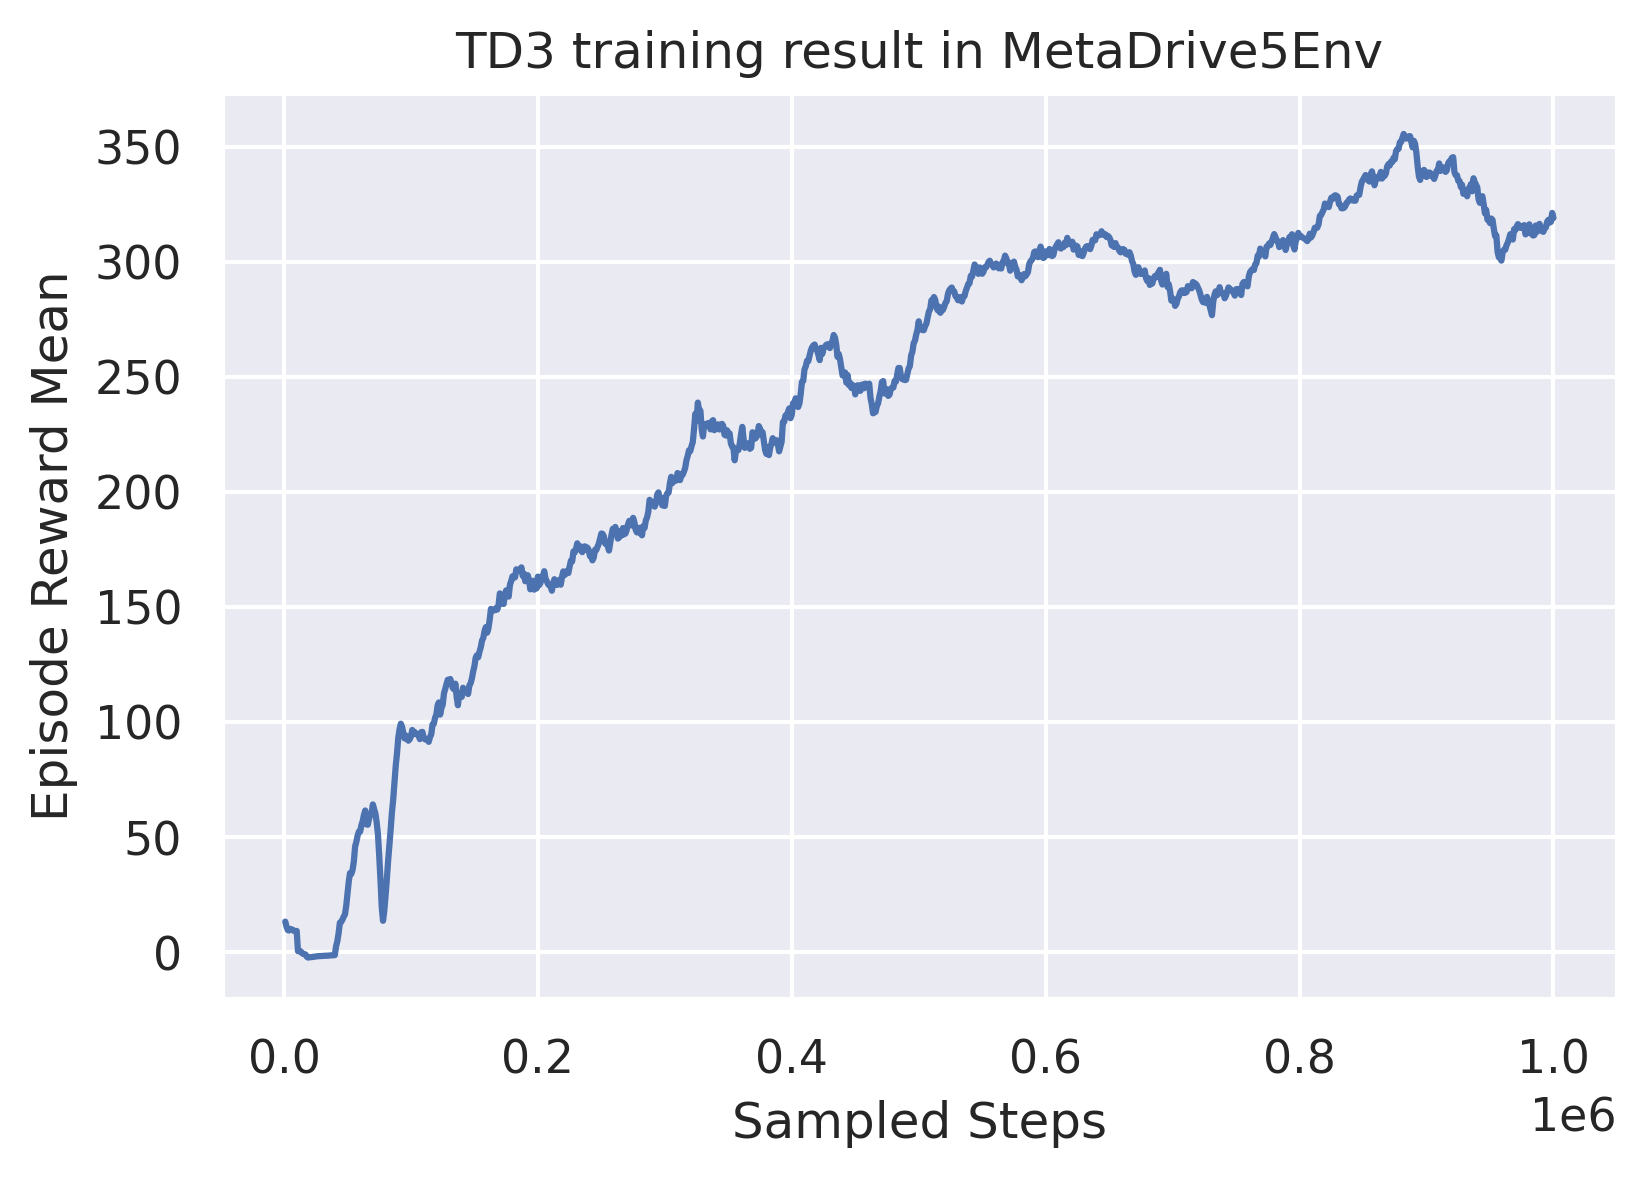

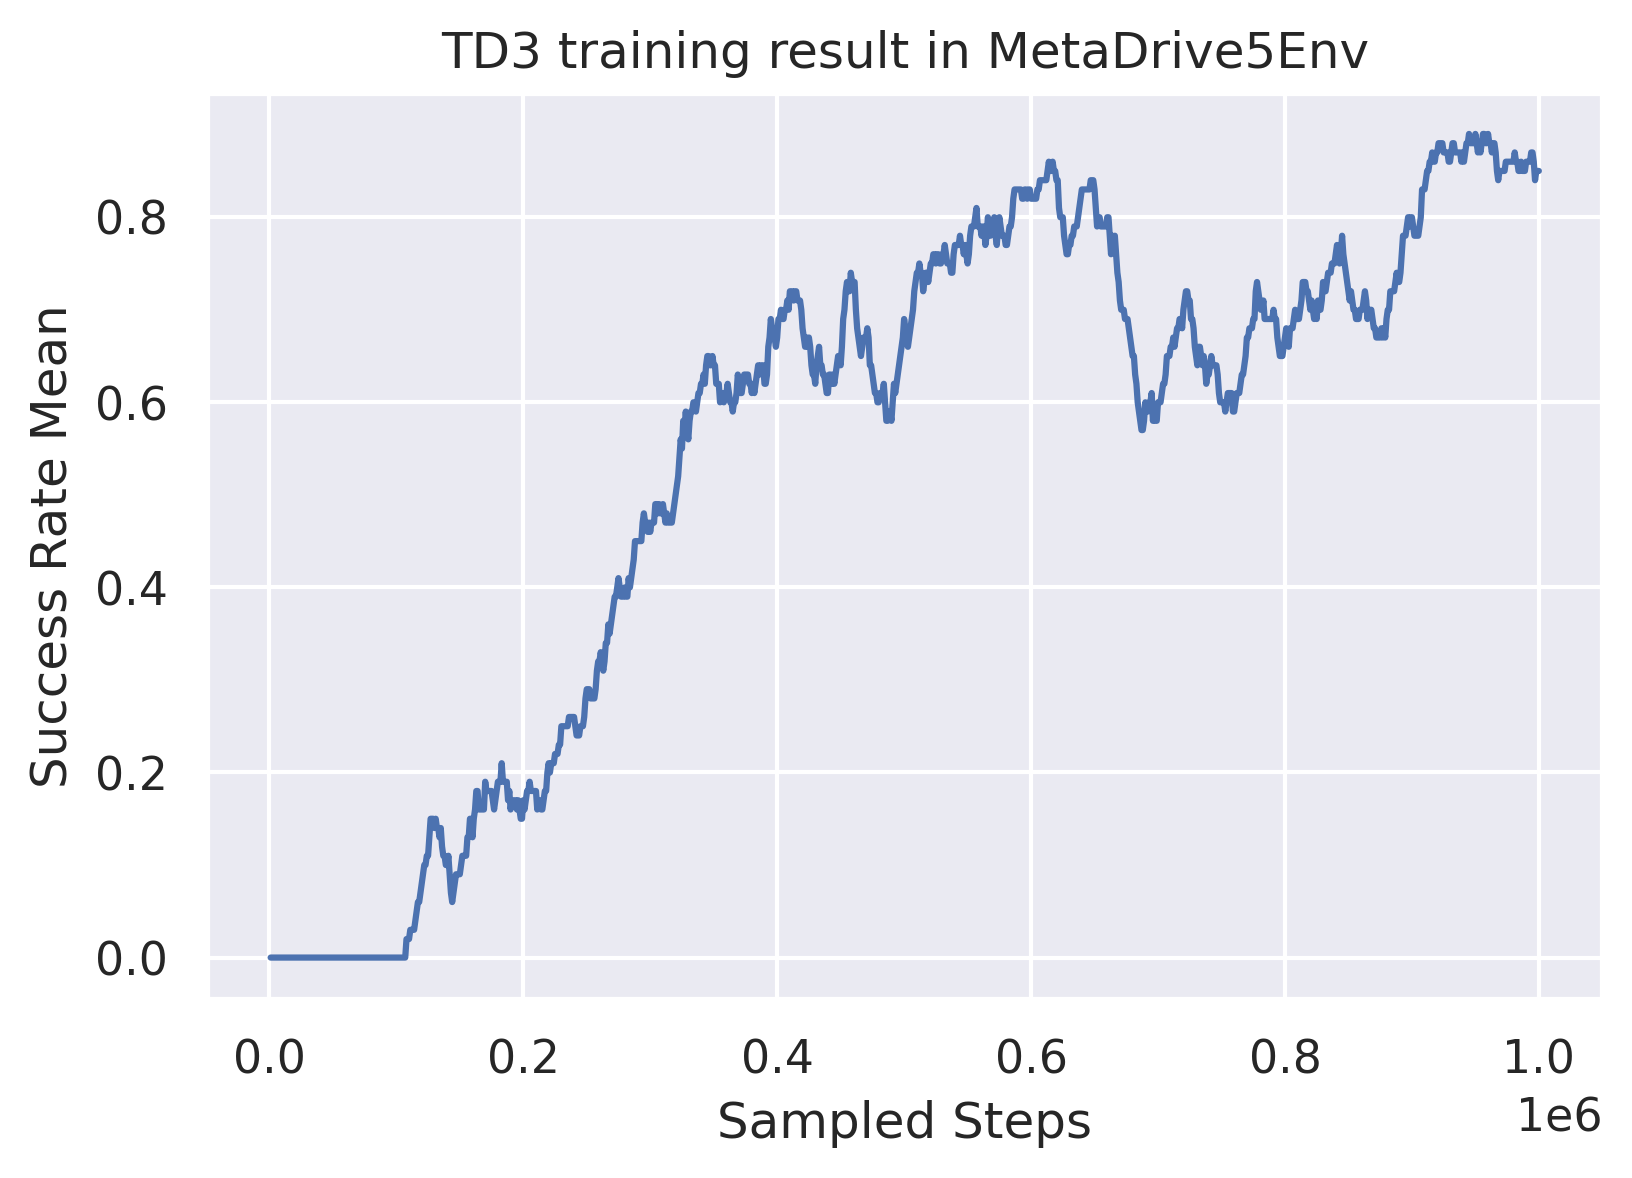

In [9]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

td3_progress = load_progress("MetaDrive5Env/TD3/data")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("TD3 training result in MetaDrive5Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("TD3 training result in MetaDrive5Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")

Text(0.5, 0, 'Sampled Steps')

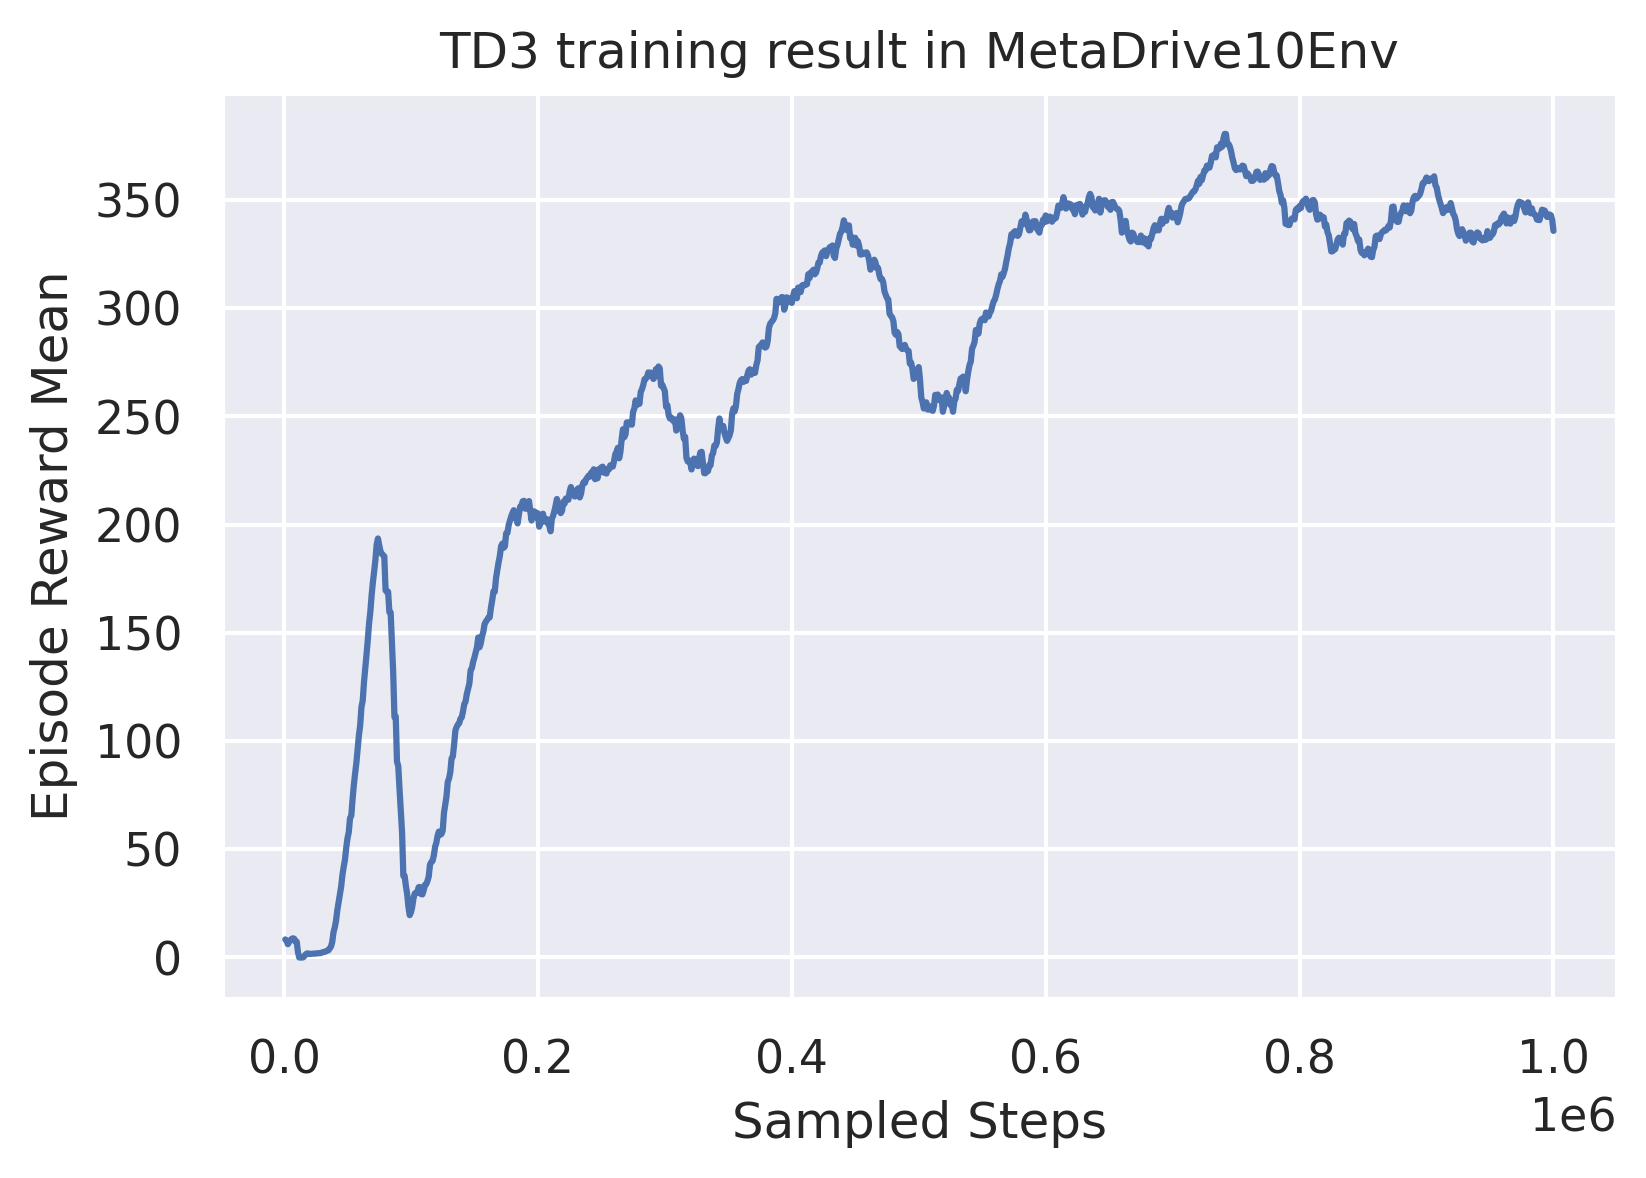

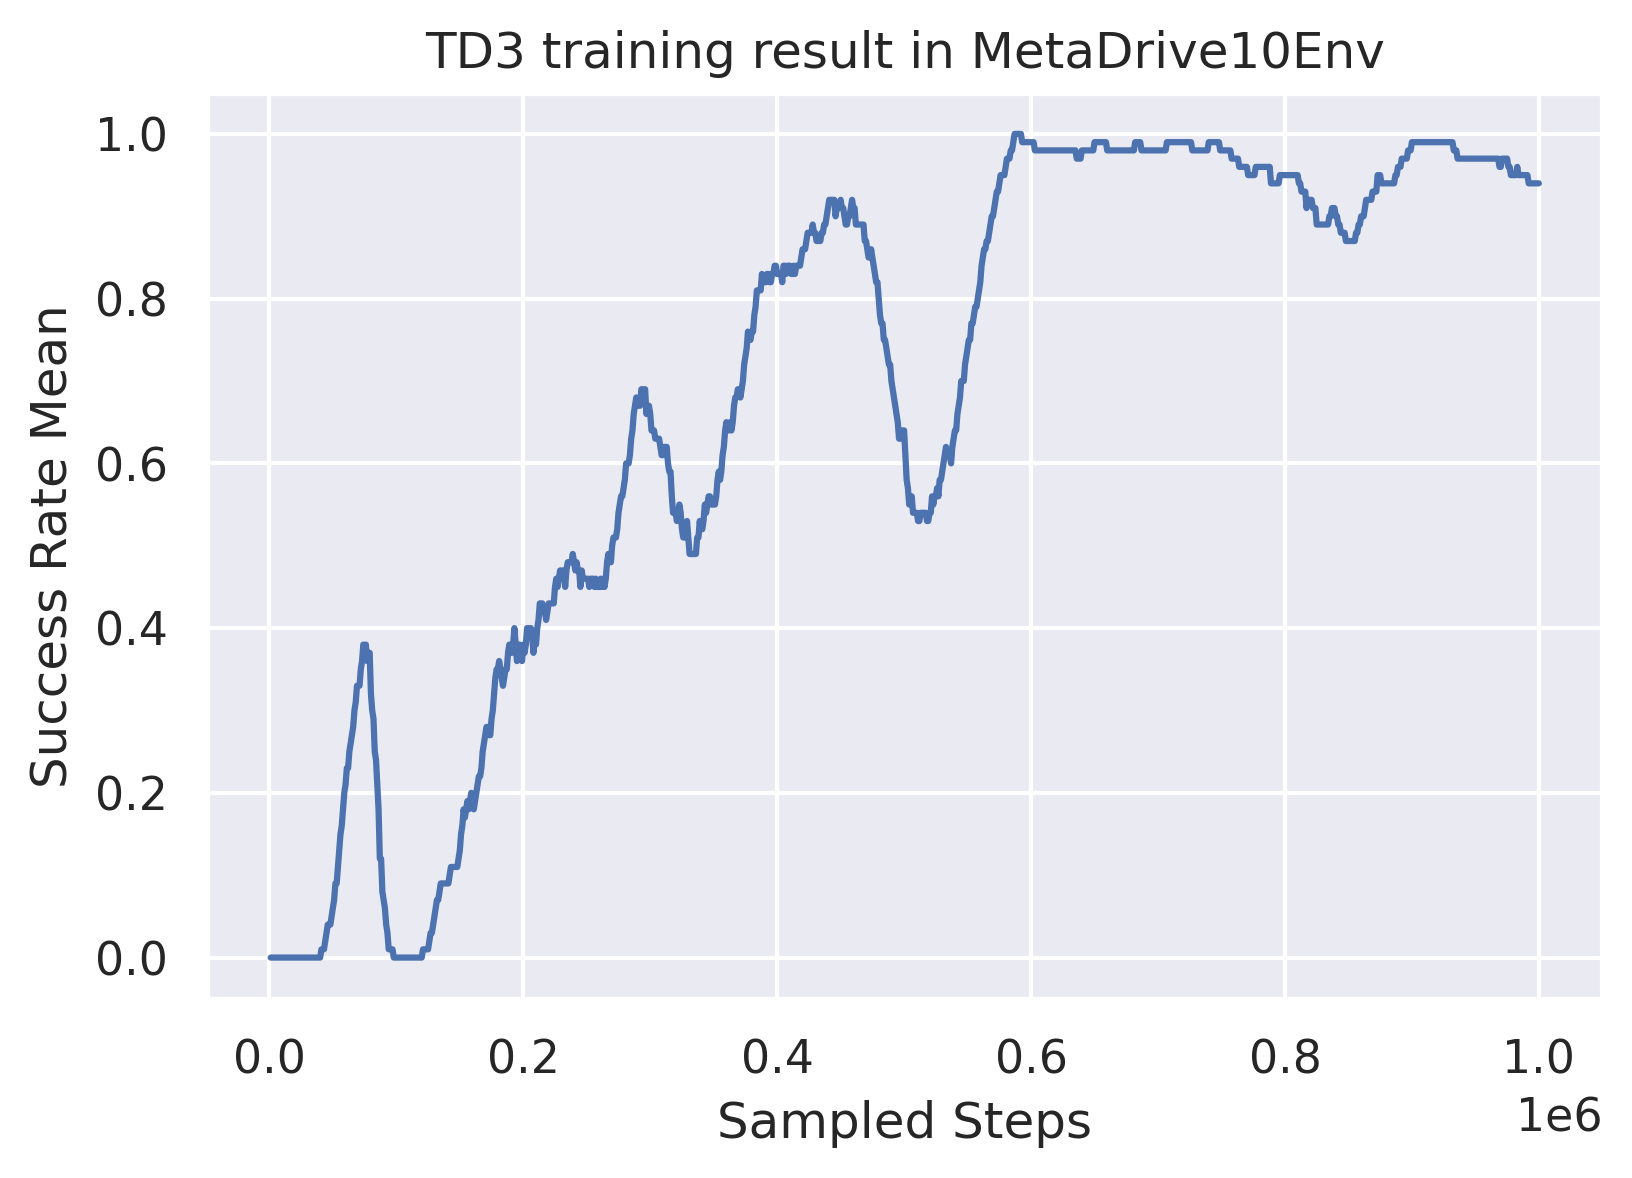

In [8]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

td3_progress = load_progress("MetaDrive10Env/TD3/data")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("TD3 training result in MetaDrive10Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("TD3 training result in MetaDrive10Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")

Text(0.5, 0, 'Sampled Steps')

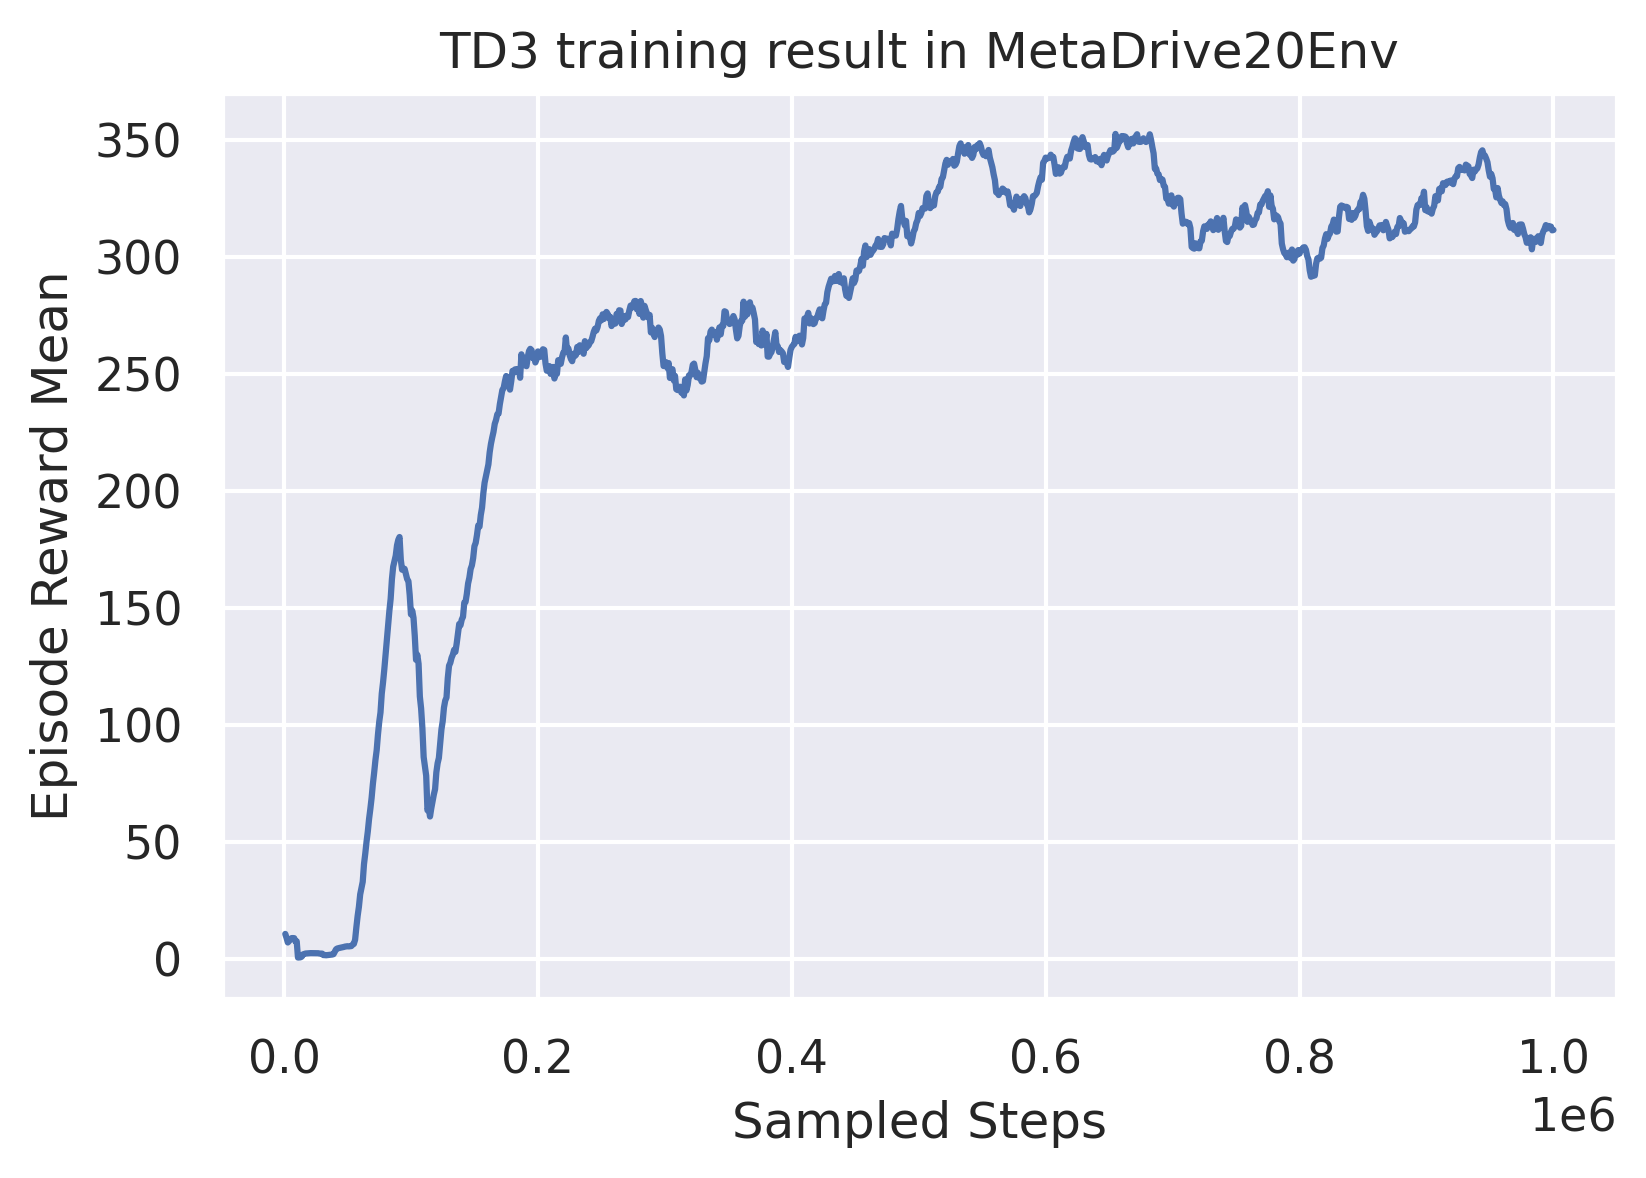

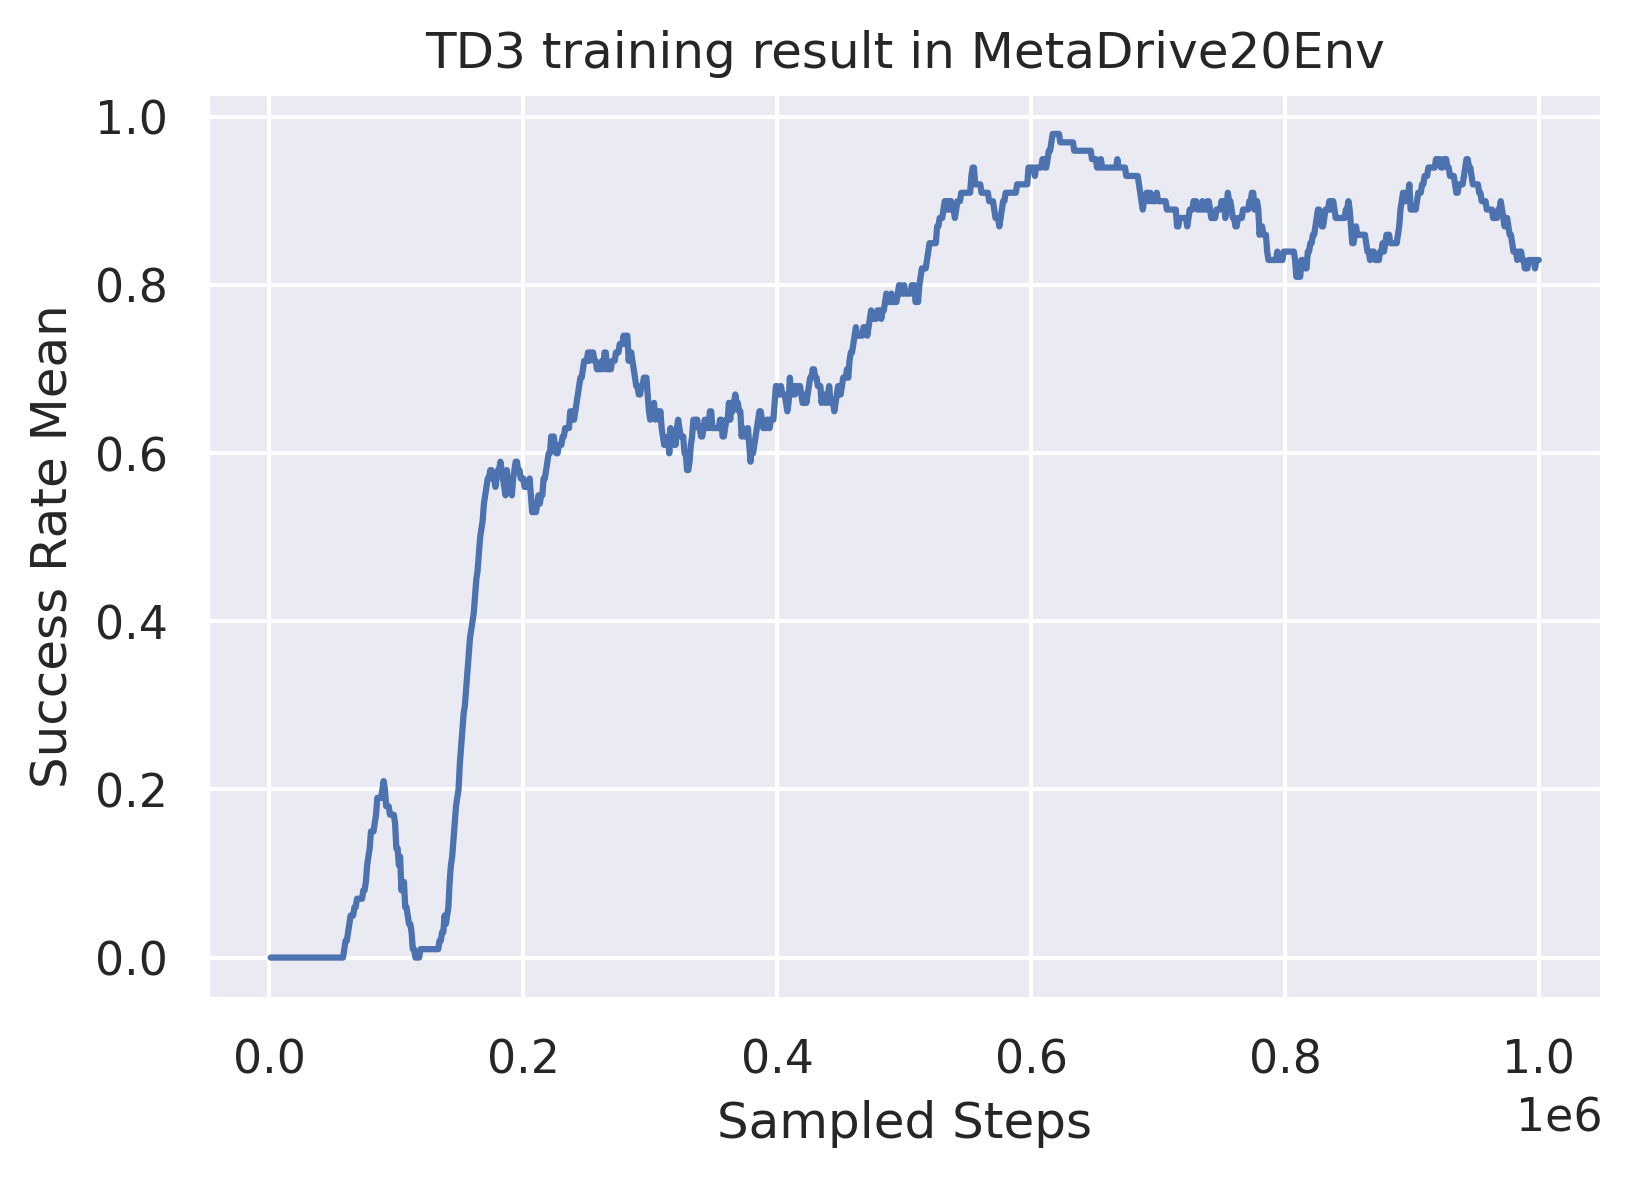

In [10]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

td3_progress = load_progress("MetaDrive20Env/TD3/data")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("TD3 training result in MetaDrive20Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("TD3 training result in MetaDrive20Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")

Text(0.5, 0, 'Sampled Steps')

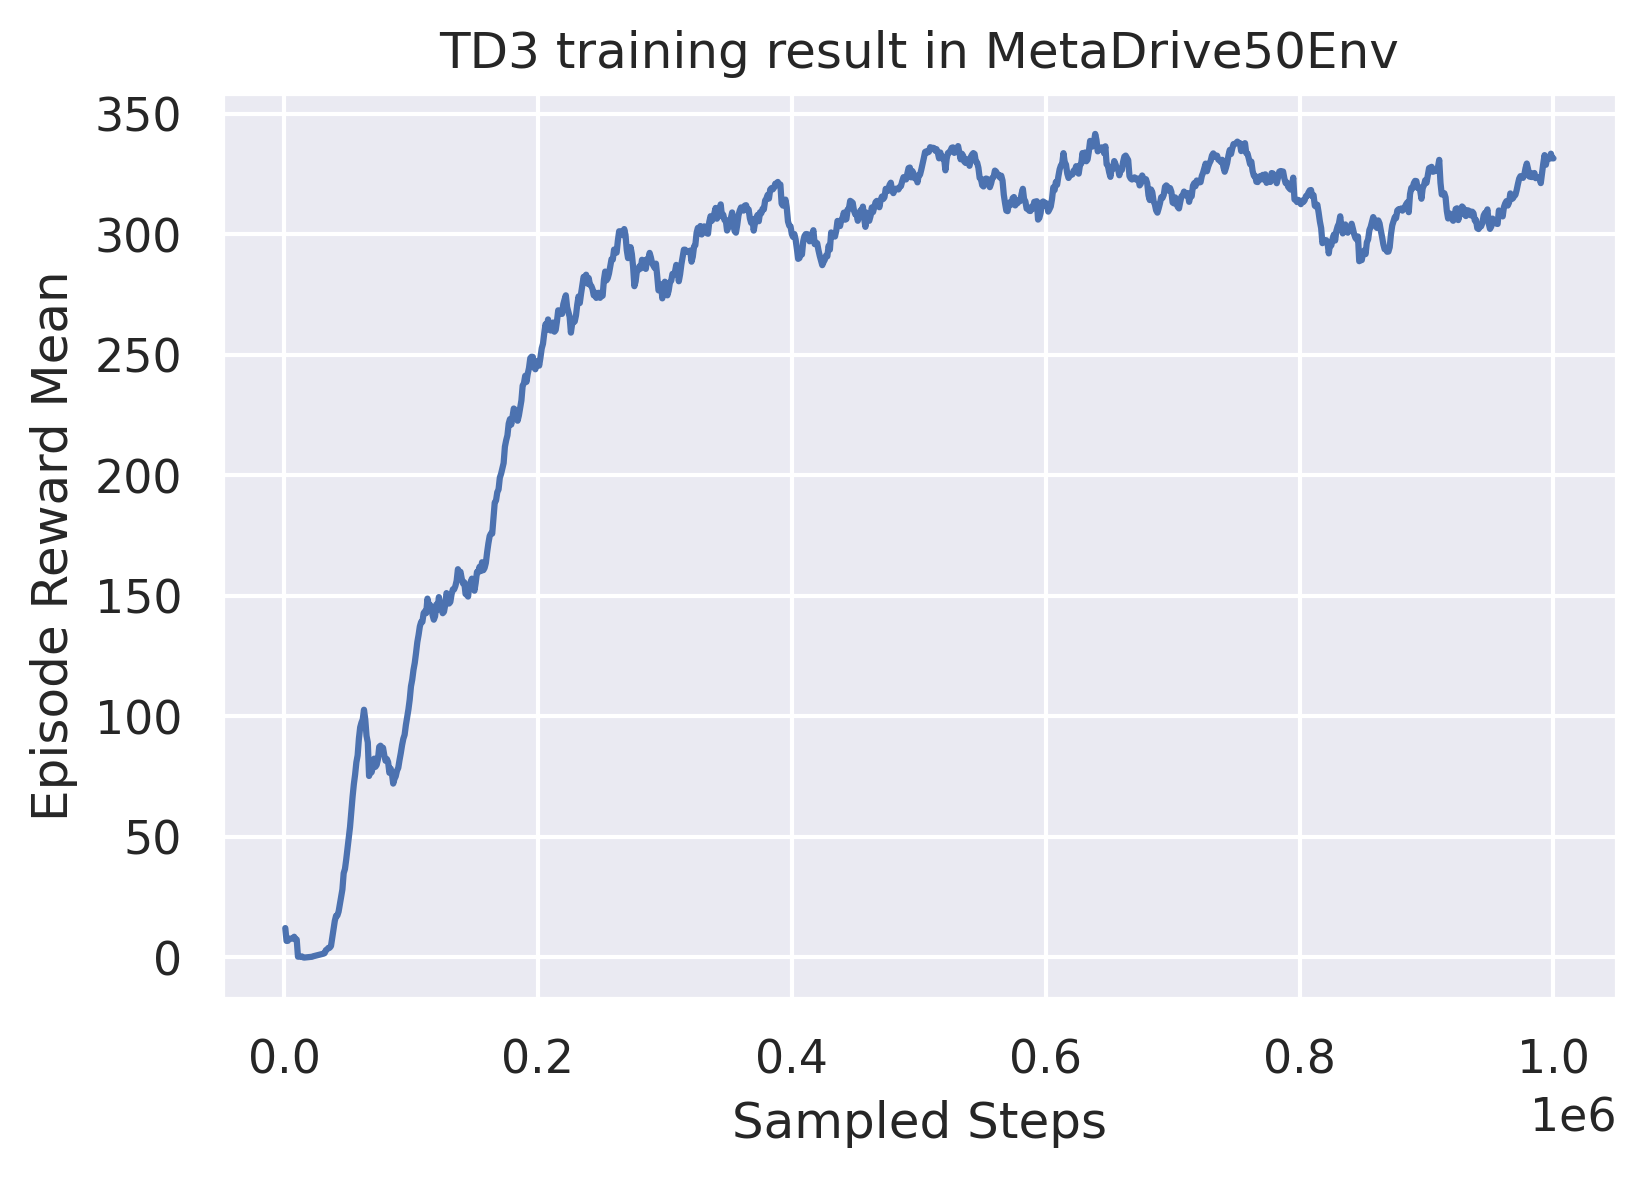

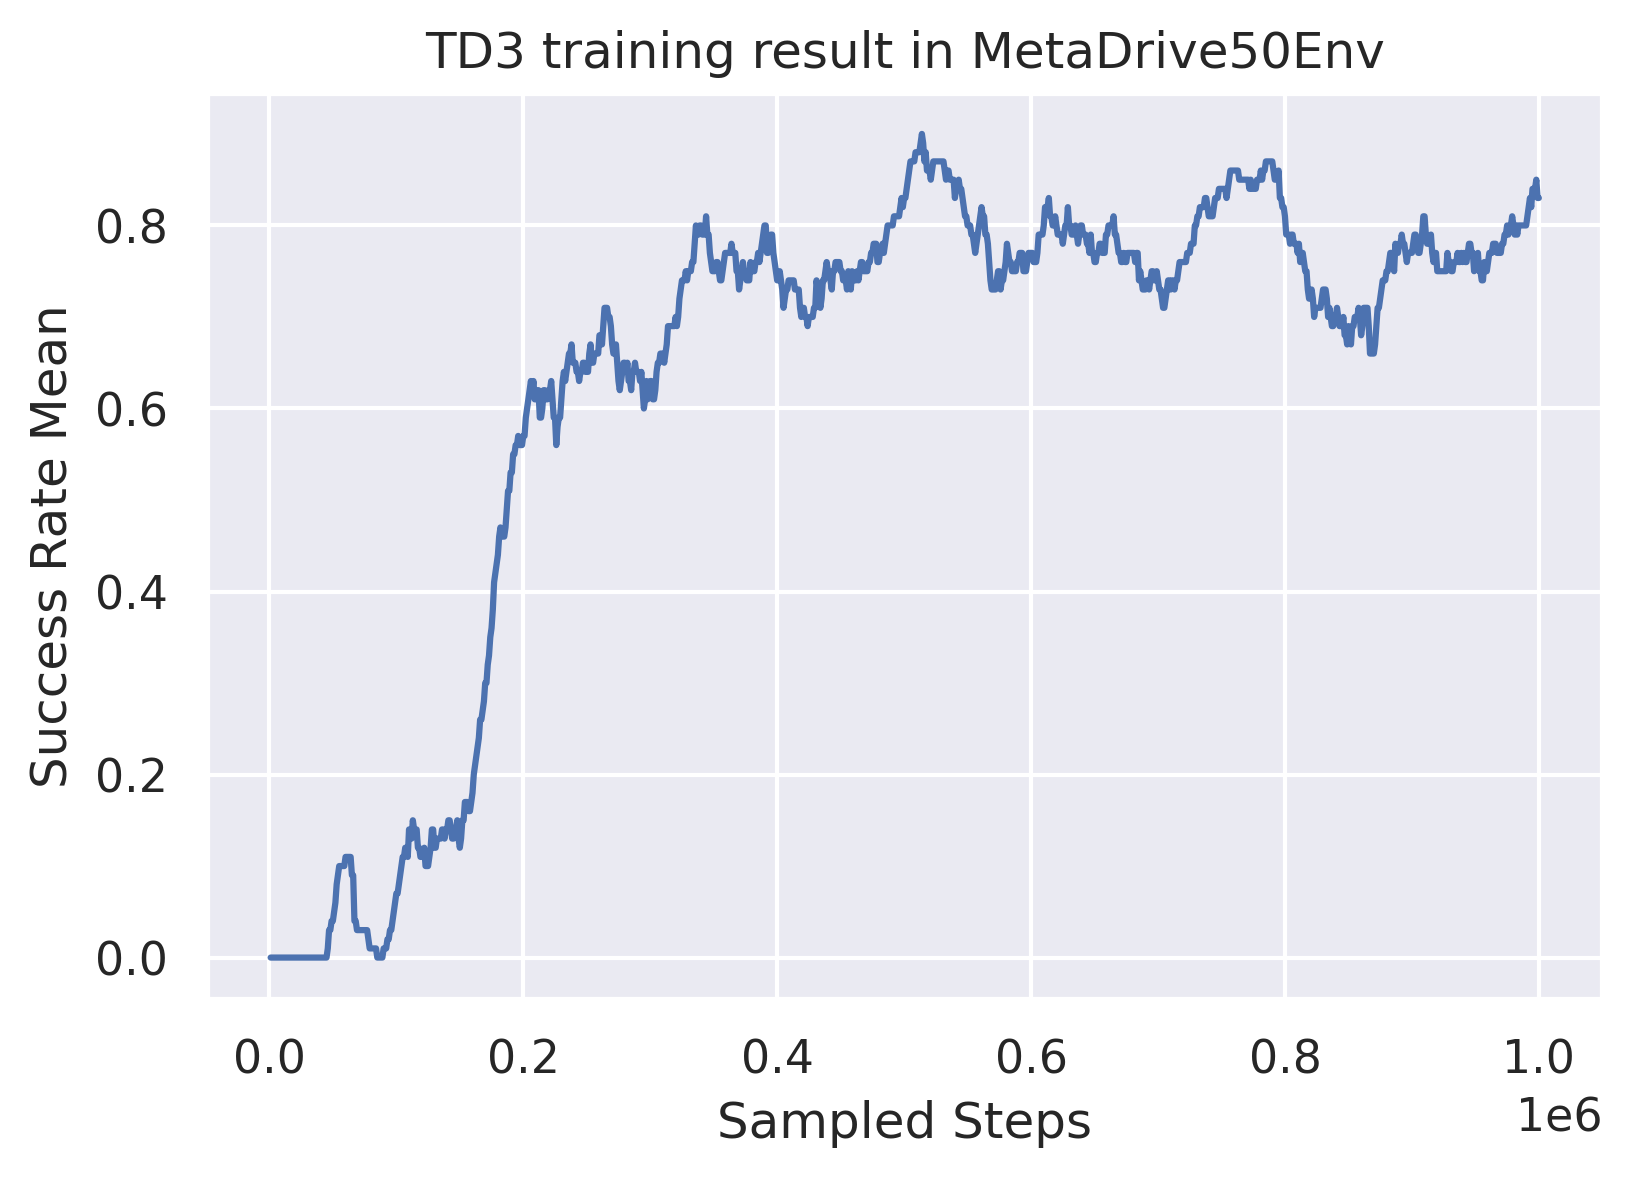

In [13]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

td3_progress = load_progress("MetaDrive50Env/TD3/data")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("TD3 training result in MetaDrive50Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("TD3 training result in MetaDrive50Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")

Text(0.5, 0, 'Sampled Steps')

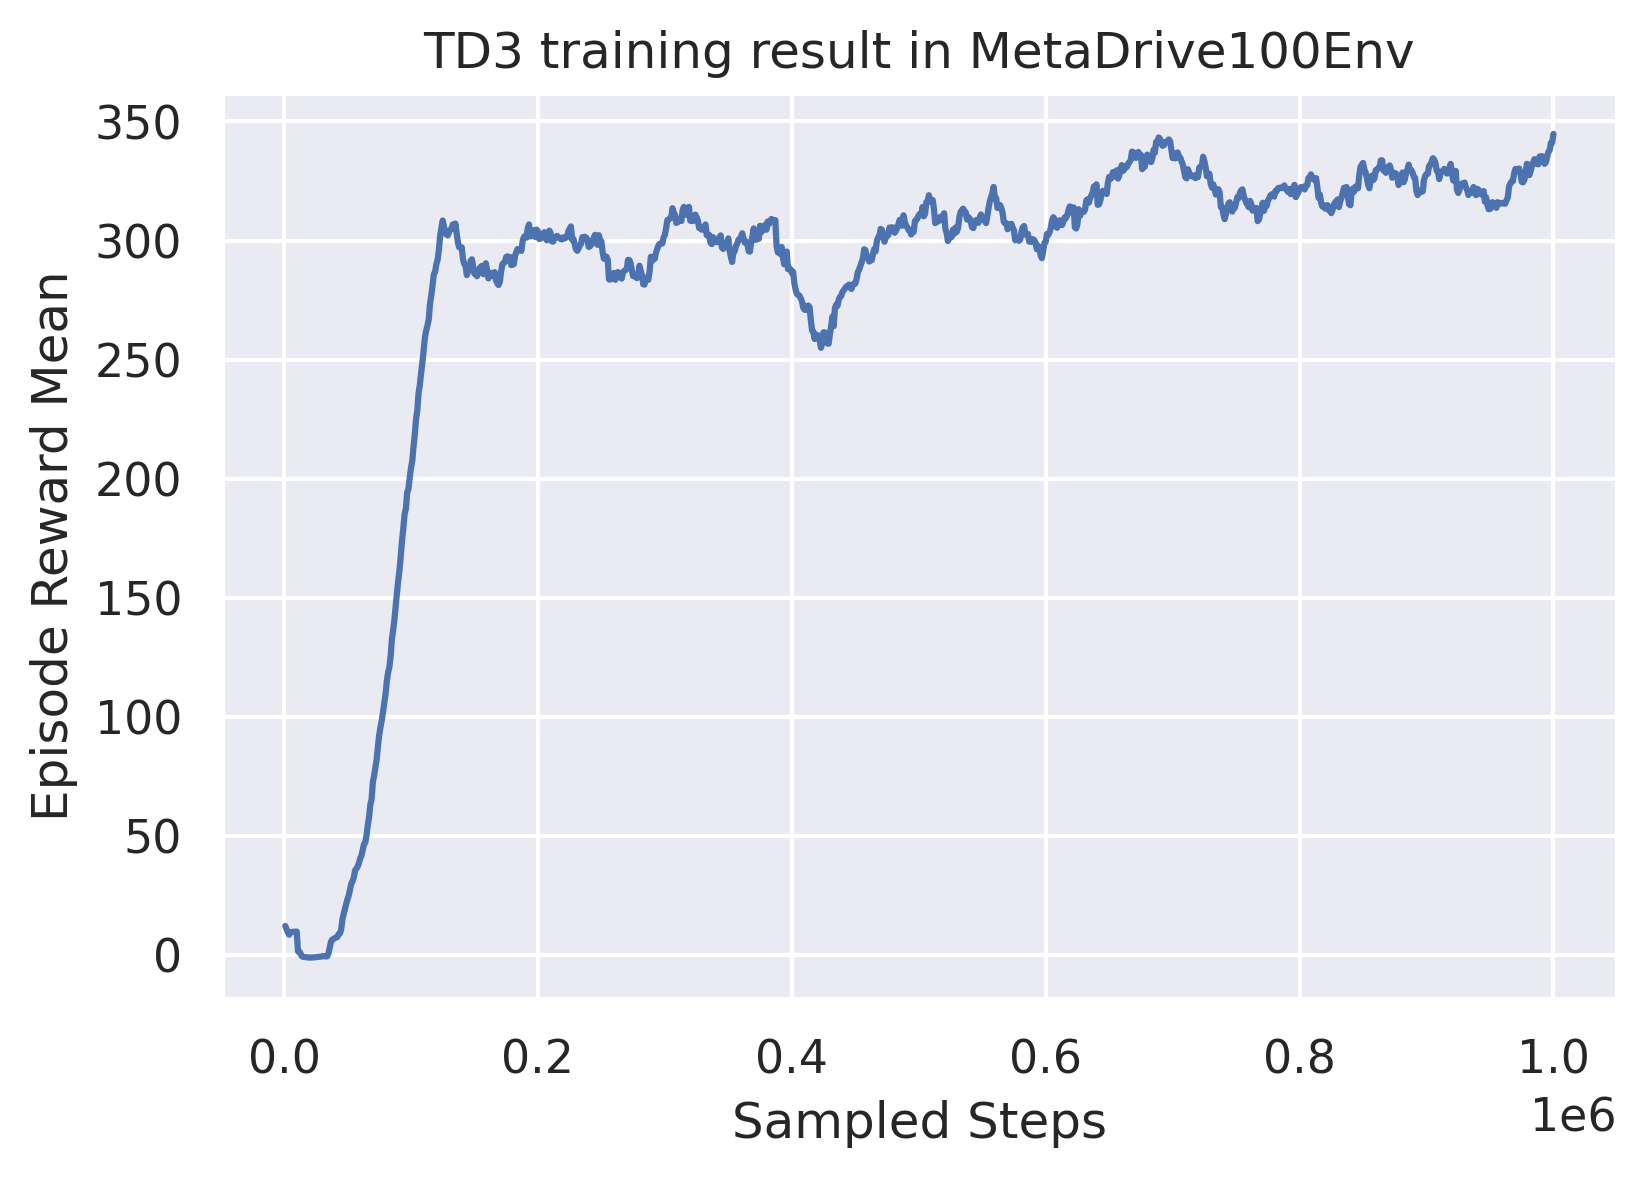

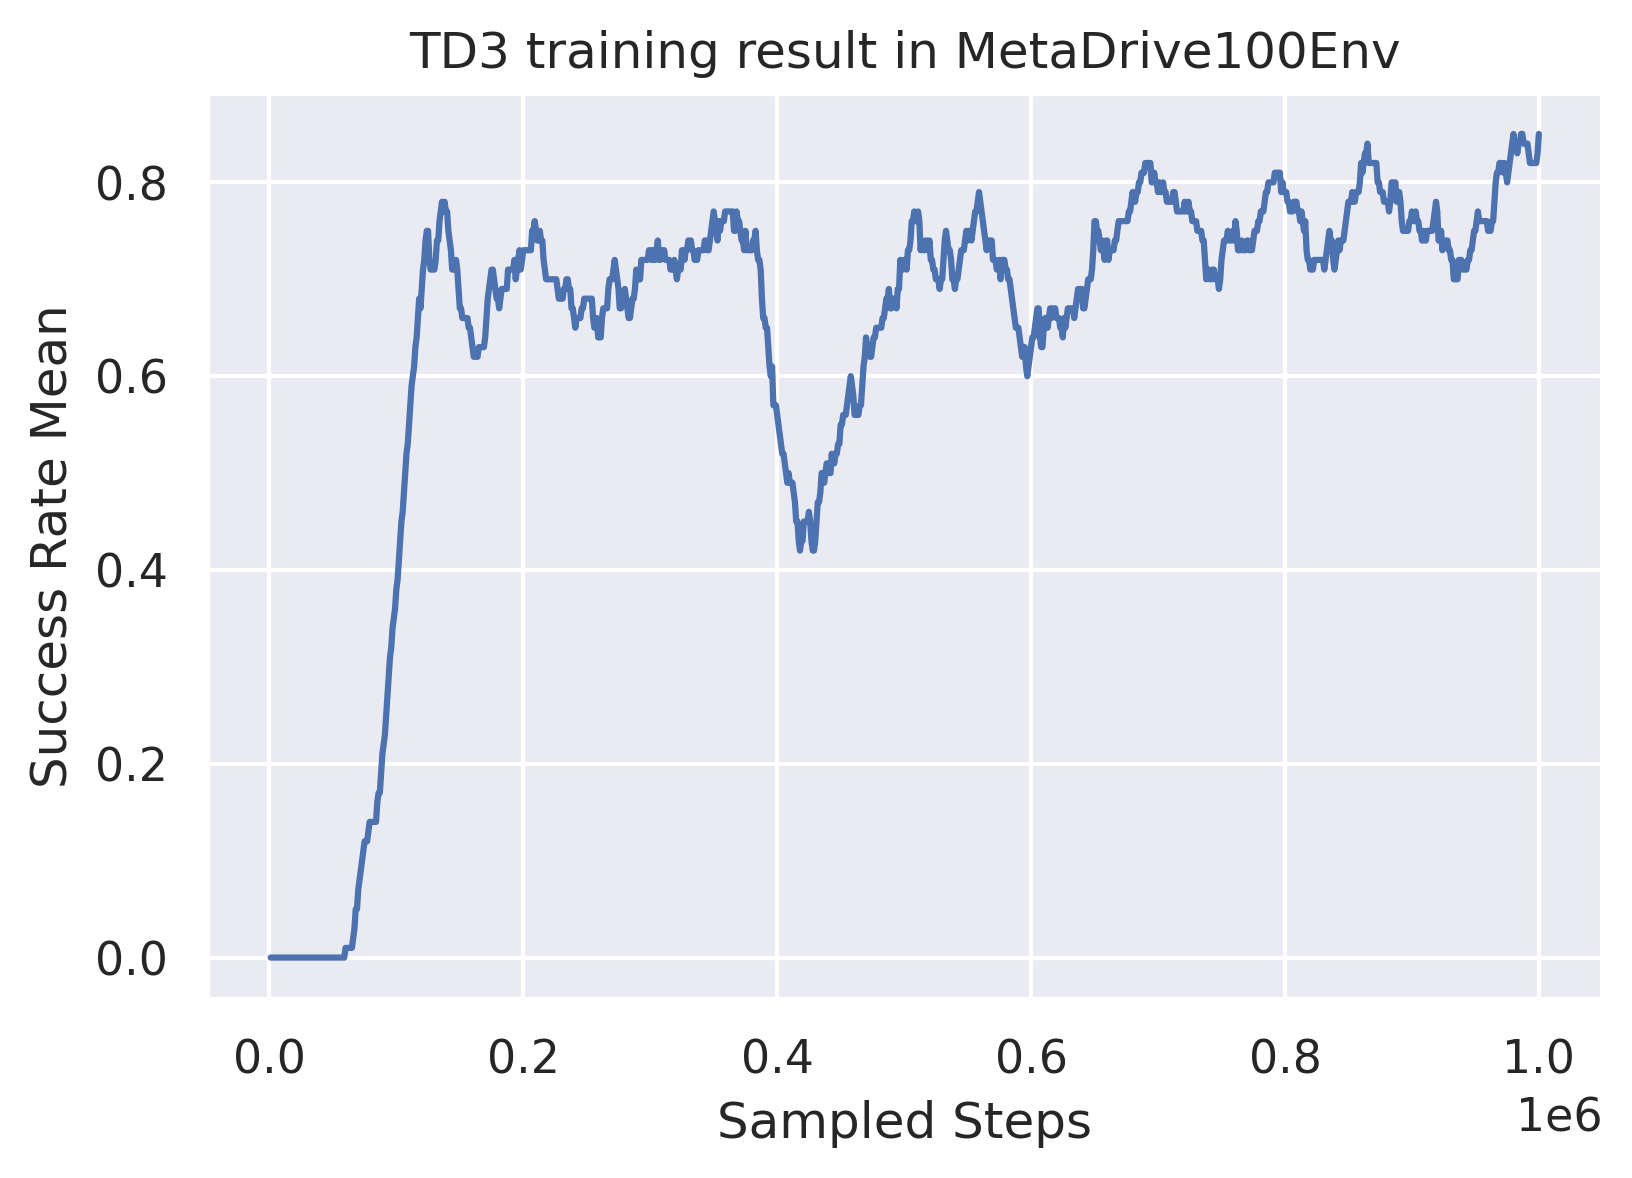

In [8]:
from core.utils import load_progress
import matplotlib.pyplot as plt
import seaborn as sns

td3_progress = load_progress("MetaDrive100Env/TD3/data")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="training_episode_reward/episode_reward_mean"
)
ax.set_title("TD3 training result in MetaDrive100Env")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")
# ax.annotate("REF", (ax.get_xlim()[1] / 3, ax.get_ylim()[0]), size=100, alpha=0.05)

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=td3_progress,
    x="total_steps",
    y="success_rate/success_rate_mean"
)
ax.set_title("TD3 training result in MetaDrive100Env")
ax.set_ylabel("Success Rate Mean")
ax.set_xlabel("Sampled Steps")